In [87]:
import pandas as pd 
import numpy as np

In [88]:
data = pd.read_csv('scrubbed.csv')
data.head()

C:\Users\Denise Campos\AppData\Local\Temp\ipykernel_20688\997564468.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('scrubbed.csv')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [90]:
for i in data.columns:
    unique_vals = data[i].unique()
    print(f"\nColumn: {i}")
    print(f"Number of unique values: {len(unique_vals)}")
    print(f"Sample unique values: {unique_vals[:10]}")


Column: datetime
Number of unique values: 69586
Sample unique values: ['10/10/1949 20:30' '10/10/1949 21:00' '10/10/1955 17:00'
 '10/10/1956 21:00' '10/10/1960 20:00' '10/10/1961 19:00'
 '10/10/1965 21:00' '10/10/1965 23:45' '10/10/1966 20:00'
 '10/10/1966 21:00']

Column: city
Number of unique values: 19900
Sample unique values: ['san marcos' 'lackland afb' 'chester (uk/england)' 'edna' 'kaneohe'
 'bristol' 'penarth (uk/wales)' 'norwalk' 'pell city' 'live oak']

Column: state
Number of unique values: 68
Sample unique values: ['tx' nan 'hi' 'tn' 'ct' 'al' 'fl' 'ca' 'nc' 'ny']

Column: country
Number of unique values: 6
Sample unique values: ['us' nan 'gb' 'ca' 'au' 'de']

Column: shape
Number of unique values: 30
Sample unique values: ['cylinder' 'light' 'circle' 'sphere' 'disk' 'fireball' 'unknown' 'oval'
 'other' 'cigar']

Column: duration (seconds)
Number of unique values: 706
Sample unique values: ['2700' '7200' '20' '900' '300' '180' '1200' '120' '1800' '30']

Column: duration (h

In [91]:
shape_counts = data['shape'].astype(str).str.lower().value_counts()

for value, count in shape_counts.items():
    print(f"'{value}' appears {count} times")

'light' appears 16565 times
'triangle' appears 7865 times
'circle' appears 7608 times
'fireball' appears 6208 times
'other' appears 5649 times
'unknown' appears 5584 times
'sphere' appears 5387 times
'disk' appears 5213 times
'oval' appears 3733 times
'formation' appears 2457 times
'cigar' appears 2057 times
'changing' appears 1962 times
'nan' appears 1932 times
'flash' appears 1328 times
'rectangle' appears 1297 times
'cylinder' appears 1283 times
'diamond' appears 1178 times
'chevron' appears 952 times
'egg' appears 759 times
'teardrop' appears 750 times
'cone' appears 316 times
'cross' appears 233 times
'delta' appears 7 times
'round' appears 2 times
'crescent' appears 2 times
'pyramid' appears 1 times
'flare' appears 1 times
'hexagon' appears 1 times
'dome' appears 1 times
'changed' appears 1 times


In [92]:
## find missing valuves empty
missingcount = data.isnull().sum()
print(missingcount)

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64


In [93]:
### lets see if there are entries lablled nan

missing_indicators = ['nan', 'na', 'n/a', 'null', 'none', 'unknown', '?', '']

suspect_counts = {}

for col in data.columns:
    count = data[col].astype(str).str.lower().isin(missing_indicators).sum()
    suspect_counts[col] = count

missing_summary = pd.DataFrame.from_dict(suspect_counts, orient='index', columns=['Suspect Missing Count'])
print(missing_summary)

                      Suspect Missing Count
datetime                                  0
city                                     41
state                                  5797
country                                9670
shape                                  7516
duration (seconds)                        0
duration (hours/min)                      0
comments                                 16
date posted                               0
latitude                                  0
longitude                                 0


In [94]:
### The unknown entries in comments doswent really matter becaause we wont need the comments colum BUT they matter in shape, state, countrym city

missing_indicators = ['nan', 'na', 'n/a', 'null', 'none', 'unknown', '?', '']

data_str = data.astype(str).apply(lambda col: col.str.lower())

mask = data_str.isin(missing_indicators).any(axis=1)

data_cleaned = data[~mask].copy()

print(f"Original rows: {len(data)}")
print(f"Cleaned rows: {len(data_cleaned)}")

Original rows: 80332
Cleaned rows: 61741


In [95]:
shape_counts = data_cleaned['shape'].astype(str).str.lower().value_counts()

for value, count in shape_counts.items():
    print(f"'{value}' appears {count} times")

'light' appears 14130 times
'triangle' appears 6817 times
'circle' appears 6405 times
'fireball' appears 5364 times
'other' appears 4705 times
'sphere' appears 4552 times
'disk' appears 4318 times
'oval' appears 3160 times
'formation' appears 2088 times
'cigar' appears 1717 times
'changing' appears 1653 times
'flash' appears 1124 times
'rectangle' appears 1117 times
'cylinder' appears 1079 times
'diamond' appears 969 times
'chevron' appears 852 times
'teardrop' appears 614 times
'egg' appears 609 times
'cone' appears 257 times
'cross' appears 197 times
'delta' appears 7 times
'round' appears 2 times
'pyramid' appears 1 times
'flare' appears 1 times
'hexagon' appears 1 times
'crescent' appears 1 times
'changed' appears 1 times


In [96]:
print(data_cleaned.dtypes)

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object


In [97]:
### so latititude should be a float so lets change it 
print("Latitude dtype:", data_cleaned['latitude'].dtype)

# Step 2: Try converting to numeric (errors='coerce' turns non-numeric into NaN)
lat_numeric = pd.to_numeric(data_cleaned['latitude'], errors='coerce')

# Step 3: Find entries that failed the numeric conversion
non_numeric_lats = data_cleaned['latitude'][lat_numeric.isna()].unique()

# Display suspect values
print("\nNon-numeric or malformed 'latitude' values:")
for val in non_numeric_lats:
    print(f"- {val}")

Latitude dtype: object

Non-numeric or malformed 'latitude' values:


In [98]:
data_cleaned['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')

In [99]:
print(data_cleaned['latitude'].dtypes)

float64


In [100]:
data_cleaned = data_cleaned.drop(['comments', 'date posted'], axis=1)
data_cleaned.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,29.883056,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,21.418056,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,36.595000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,41.117500,-73.408333


In [101]:
## splitting my datetime column

# Convert 'datetime' column to datetime objects
data_cleaned['datetime'] = pd.to_datetime(data_cleaned['datetime'], errors='coerce')

# Create new 'date' and 'time' columns
data_cleaned['date'] = data_cleaned['datetime'].dt.date
data_cleaned['time'] = data_cleaned['datetime'].dt.time

data_cleaned.drop('datetime', axis=1, inplace=True)
data_cleaned.head()

,city,state,country,shape,duration (seconds),duration (hours/min),latitude,longitude,date,time
0,san marcos,tx,us,cylinder,2700,45 minutes,29.883056,-97.941111,1949-10-10,20:30:00
3,edna,tx,us,circle,20,1/2 hour,28.978333,-96.645833,1956-10-10,21:00:00
4,kaneohe,hi,us,light,900,15 minutes,21.418056,-157.803611,1960-10-10,20:00:00
5,bristol,tn,us,sphere,300,5 minutes,36.595000,-82.188889,1961-10-10,19:00:00
7,norwalk,ct,us,disk,1200,20 minutes,41.117500,-73.408333,1965-10-10,23:45:00


In [102]:
data_cleaned.to_csv("cleaned_ufo_data.csv", index=False)

In [103]:
import pandas as pd
import requests
from tqdm import tqdm
import time
import os

# === LOAD CLEANED UFO DATA ===
df = pd.read_csv("cleaned_ufo_data.csv")

# Standardize column names
df.columns = df.columns.str.strip()

# Convert date and drop missing values
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date
df = df.dropna(subset=['date', 'latitude', 'longitude'])

# Round lat/lon to avoid excessive API calls
df['latitude'] = df['latitude'].round(2)
df['longitude'] = df['longitude'].round(2)

# Deduplicate based on (date, lat, lon)
keys = df[['date', 'latitude', 'longitude']].drop_duplicates()

# Output settings
weather_data = []
autosave_path = "weather_autosave.csv"
final_path = "weather_openmeteo_full.csv"
backup_interval = 1000  # autosave every 1000

# Resume support
done_keys = set()
if os.path.exists(autosave_path):
    try:
        old = pd.read_csv(autosave_path)
        old['date'] = pd.to_datetime(old['date'], errors='coerce').dt.date
        done_keys = set(zip(old['date'], old['latitude'].round(2), old['longitude'].round(2)))
        weather_data = old.to_dict(orient='records')
        print(f"🔁 Resuming from previous progress ({len(weather_data)} records)...")
    except Exception as e:
        print("⚠️ Error loading previous progress:", e)

# Start loop with progress bar
for i, row in tqdm(keys.iterrows(), total=len(keys), desc="Scraping weather data"):
    date = row['date']
    lat = row['latitude']
    lon = row['longitude']
    key = (date, lat, lon)

    if key in done_keys:
        continue

    url = (
        f"https://archive-api.open-meteo.com/v1/archive?"
        f"latitude={lat}&longitude={lon}&start_date={date}&end_date={date}"
        f"&hourly=temperature_2m,pressure_msl,visibility,cloudcover"
    )

    try:
        response = requests.get(url)
        data = response.json()

        if 'hourly' in data and 'temperature_2m' in data['hourly']:
            hourly = pd.DataFrame(data['hourly'])

            weather = {
                'date': date,
                'latitude': lat,
                'longitude': lon,
                'temperature_2m': pd.Series(hourly['temperature_2m']).mean(),
                'pressure_msl': pd.Series(hourly['pressure_msl']).mean(),
                'visibility': pd.Series(hourly['visibility']).mean() if 'visibility' in hourly else None,
                'cloudcover': pd.Series(hourly['cloudcover']).mean()
            }

            weather_data.append(weather)
            done_keys.add(key)

            # Autosave
            if len(weather_data) % backup_interval == 0:
                pd.DataFrame(weather_data).to_csv(autosave_path, index=False)
                print(f"💾 Autosaved {len(weather_data)} records...")

    except Exception as e:
        print(f"[{i}] Error at {key}: {e}")

    time.sleep(1)  # prevent overloading the API

# Final save
pd.DataFrame(weather_data).to_csv(final_path, index=False)
print(f"\n✅ Full weather data saved to {final_path}")


Scraping weather data:   0%|                                                      | 3/58971 [00:05<29:35:20,  1.81s/it]


KeyboardInterrupt: 

In [4]:
import pandas as pd
import requests
from tqdm import tqdm
import time
import os

# === LOAD DATA ===
df = pd.read_csv("cleaned_ufo_data.csv")
df.columns = df.columns.str.strip()

# Clean and parse date
# Rename fixed column names just in case
df = df.rename(columns={'longitude ': 'longitude'})

# Parse and clean date
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date

# Drop rows with missing values in required columns
df = df.dropna(subset=['date', 'latitude', 'longitude'])

# Round coordinates
df['latitude'] = df['latitude'].round(2)
df['longitude'] = df['longitude'].round(2)

# Deduplicated (date, lat, lon)
keys = df[['date', 'latitude', 'longitude']].drop_duplicates().reset_index(drop=True)

# === Resume support ===
existing = pd.DataFrame()
final_path = "weather_final_full.csv"

if os.path.exists(final_path):
    existing = pd.read_csv(final_path)
    existing['date'] = pd.to_datetime(existing['date']).dt.date
    existing['latitude'] = existing['latitude'].round(2)
    existing['longitude'] = existing['longitude'].round(2)
    print(f"📂 Found {len(existing)} previously saved records.")
else:
    print("📂 No previously saved data found.")

# Filter out already scraped records
keys['key'] = keys.apply(lambda row: (row['date'], row['latitude'], row['longitude']), axis=1)
if not existing.empty:
    existing['key'] = existing.apply(lambda row: (row['date'], row['latitude'], row['longitude']), axis=1)
    keys = keys[~keys['key'].isin(existing['key'])].drop(columns='key').reset_index(drop=True)
else:
    keys = keys.drop(columns='key')

print(f"🚀 Starting with {len(keys)} new rows to scrape...")

# === Scraping ===
weather_data = []
autosave_path = "weather_autosave.csv"

for i, row in tqdm(keys.iterrows(), total=len(keys), desc="Scraping weather data"):
    date = row['date']
    lat = row['latitude']
    lon = row['longitude']
    
    url = (
        f"https://archive-api.open-meteo.com/v1/archive?"
        f"latitude={lat}&longitude={lon}&start_date={date}&end_date={date}"
        f"&hourly=temperature_2m,pressure_msl,visibility,cloudcover"
    )

    try:
        response = requests.get(url, timeout=20)
        data = response.json()

        if 'hourly' in data and 'temperature_2m' in data['hourly']:
            hourly = pd.DataFrame(data['hourly'])
            daily_avg = {
                'date': date,
                'latitude': lat,
                'longitude': lon,
                'temperature_2m': pd.Series(hourly['temperature_2m']).mean(),
                'pressure_msl': pd.Series(hourly['pressure_msl']).mean(),
                'visibility': pd.Series(hourly['visibility']).mean() if 'visibility' in hourly else None,
                'cloudcover': pd.Series(hourly['cloudcover']).mean(),
            }
            weather_data.append(daily_avg)

        # Autosave every 1000
        if i > 0 and i % 100 == 0:
            df_existing = pd.read_csv(final_path) if os.path.exists(final_path) else pd.DataFrame()
            new_df = pd.DataFrame(weather_data)
            all_df = pd.concat([df_existing, new_df], ignore_index=True)
            all_df.to_csv(final_path, index=False)
            weather_data = []
            print(f"💾 Autosaved {len(all_df)} records...")

    except Exception as e:
        print(f"[{i}] Error at ({date}, {lat}, {lon}):", e)

    time.sleep(1)

# Final save
if weather_data:
    df_existing = pd.read_csv(final_path) if os.path.exists(final_path) else pd.DataFrame()
    new_df = pd.DataFrame(weather_data)
    all_df = pd.concat([df_existing, new_df], ignore_index=True)
    all_df.to_csv(final_path, index=False)
    print(f"✅ Final save completed. Total records: {len(all_df)}")
else:
    print("✅ No new records to save.")


📂 Found 9000 previously saved records.
🚀 Starting with 49971 new rows to scrape...


Scraping weather data:   0%|                                                    | 100/49971 [02:35<21:32:01,  1.55s/it]

💾 Autosaved 9100 records...


Scraping weather data:   0%|▏                                                   | 200/49971 [05:11<21:33:55,  1.56s/it]

💾 Autosaved 9200 records...


Scraping weather data:   1%|▎                                                   | 300/49971 [07:50<21:39:05,  1.57s/it]

💾 Autosaved 9300 records...


Scraping weather data:   1%|▍                                                   | 400/49971 [10:28<21:44:28,  1.58s/it]

💾 Autosaved 9400 records...


Scraping weather data:   1%|▌                                                   | 500/49971 [13:06<21:41:44,  1.58s/it]

💾 Autosaved 9500 records...


Scraping weather data:   1%|▌                                                   | 600/49971 [15:45<21:37:40,  1.58s/it]

💾 Autosaved 9600 records...


Scraping weather data:   1%|▋                                                   | 700/49971 [18:23<21:37:32,  1.58s/it]

💾 Autosaved 9700 records...


Scraping weather data:   2%|▊                                                   | 800/49971 [21:02<21:53:30,  1.60s/it]

💾 Autosaved 9800 records...


Scraping weather data:   2%|▉                                                   | 900/49971 [23:41<21:28:45,  1.58s/it]

💾 Autosaved 9900 records...


Scraping weather data:   2%|█                                                  | 1000/49971 [26:20<21:29:27,  1.58s/it]

💾 Autosaved 10000 records...


Scraping weather data:   2%|█                                                  | 1100/49971 [28:59<21:15:48,  1.57s/it]

💾 Autosaved 10100 records...


Scraping weather data:   2%|█▏                                                 | 1200/49971 [31:37<21:26:13,  1.58s/it]

💾 Autosaved 10200 records...


Scraping weather data:   3%|█▎                                                 | 1300/49971 [34:16<21:16:14,  1.57s/it]

💾 Autosaved 10300 records...


Scraping weather data:   3%|█▍                                                 | 1400/49971 [36:55<21:20:52,  1.58s/it]

💾 Autosaved 10400 records...


Scraping weather data:   3%|█▌                                                 | 1500/49971 [39:33<21:10:23,  1.57s/it]

💾 Autosaved 10500 records...


Scraping weather data:   3%|█▋                                                 | 1600/49971 [42:11<21:01:33,  1.56s/it]

💾 Autosaved 10600 records...


Scraping weather data:   3%|█▋                                                 | 1700/49971 [44:49<21:10:29,  1.58s/it]

💾 Autosaved 10700 records...


Scraping weather data:   4%|█▊                                                 | 1800/49971 [47:28<21:07:53,  1.58s/it]

💾 Autosaved 10800 records...


Scraping weather data:   4%|█▉                                                 | 1900/49971 [50:07<21:44:46,  1.63s/it]

💾 Autosaved 10900 records...


Scraping weather data:   4%|██                                                 | 2000/49971 [52:46<21:00:25,  1.58s/it]

💾 Autosaved 11000 records...


Scraping weather data:   4%|██▏                                                | 2100/49971 [55:25<20:55:21,  1.57s/it]

💾 Autosaved 11100 records...


Scraping weather data:   4%|██▏                                                | 2200/49971 [58:03<20:45:48,  1.56s/it]

💾 Autosaved 11200 records...


Scraping weather data:   5%|██▎                                              | 2300/49971 [1:00:41<20:59:20,  1.59s/it]

💾 Autosaved 11300 records...


Scraping weather data:   5%|██▎                                              | 2400/49971 [1:03:19<20:51:10,  1.58s/it]

💾 Autosaved 11400 records...


Scraping weather data:   5%|██▍                                              | 2500/49971 [1:05:57<20:54:10,  1.59s/it]

💾 Autosaved 11500 records...


Scraping weather data:   5%|██▌                                              | 2600/49971 [1:08:36<20:41:17,  1.57s/it]

💾 Autosaved 11600 records...


Scraping weather data:   5%|██▋                                              | 2700/49971 [1:11:14<20:39:10,  1.57s/it]

💾 Autosaved 11700 records...


Scraping weather data:   6%|██▋                                              | 2800/49971 [1:13:52<21:13:41,  1.62s/it]

💾 Autosaved 11800 records...


Scraping weather data:   6%|██▊                                              | 2900/49971 [1:16:31<20:48:16,  1.59s/it]

💾 Autosaved 11900 records...


Scraping weather data:   6%|██▉                                              | 3000/49971 [1:19:09<20:31:28,  1.57s/it]

💾 Autosaved 12000 records...


Scraping weather data:   6%|███                                              | 3100/49971 [1:21:48<20:43:51,  1.59s/it]

💾 Autosaved 12100 records...


Scraping weather data:   6%|███▏                                             | 3200/49971 [1:24:27<20:34:04,  1.58s/it]

💾 Autosaved 12200 records...


Scraping weather data:   7%|███▏                                             | 3300/49971 [1:27:05<20:23:23,  1.57s/it]

💾 Autosaved 12300 records...


Scraping weather data:   7%|███▎                                             | 3400/49971 [1:29:44<20:35:05,  1.59s/it]

💾 Autosaved 12400 records...


Scraping weather data:   7%|███▍                                             | 3500/49971 [1:32:22<20:23:45,  1.58s/it]

💾 Autosaved 12500 records...


Scraping weather data:   7%|███▌                                             | 3600/49971 [1:35:01<20:22:43,  1.58s/it]

💾 Autosaved 12600 records...


Scraping weather data:   7%|███▋                                             | 3700/49971 [1:37:39<20:23:22,  1.59s/it]

💾 Autosaved 12700 records...


Scraping weather data:   8%|███▋                                             | 3800/49971 [1:40:19<21:04:27,  1.64s/it]

💾 Autosaved 12800 records...


Scraping weather data:   8%|███▊                                             | 3900/49971 [1:43:00<20:41:34,  1.62s/it]

💾 Autosaved 12900 records...


Scraping weather data:   8%|███▉                                             | 4000/49971 [1:45:39<20:16:59,  1.59s/it]

💾 Autosaved 13000 records...


Scraping weather data:   8%|████                                             | 4100/49971 [1:48:19<20:22:19,  1.60s/it]

💾 Autosaved 13100 records...


Scraping weather data:   8%|████                                             | 4200/49971 [1:51:00<20:07:56,  1.58s/it]

💾 Autosaved 13200 records...


Scraping weather data:   9%|████▏                                            | 4300/49971 [1:53:39<20:04:20,  1.58s/it]

💾 Autosaved 13300 records...


Scraping weather data:   9%|████▎                                            | 4400/49971 [1:56:18<20:03:31,  1.58s/it]

💾 Autosaved 13400 records...


Scraping weather data:   9%|████▍                                            | 4500/49971 [1:58:57<19:51:09,  1.57s/it]

💾 Autosaved 13500 records...


Scraping weather data:   9%|████▌                                            | 4600/49971 [2:01:36<20:03:42,  1.59s/it]

💾 Autosaved 13600 records...


Scraping weather data:   9%|████▌                                            | 4700/49971 [2:04:14<19:49:28,  1.58s/it]

💾 Autosaved 13700 records...


Scraping weather data:  10%|████▋                                            | 4800/49971 [2:06:52<19:47:14,  1.58s/it]

💾 Autosaved 13800 records...


Scraping weather data:  10%|████▊                                            | 4900/49971 [2:09:31<19:43:19,  1.58s/it]

💾 Autosaved 13900 records...


Scraping weather data:  10%|████▉                                            | 5000/49971 [2:12:10<19:37:19,  1.57s/it]

💾 Autosaved 14000 records...


Scraping weather data:  10%|█████                                            | 5100/49971 [2:14:48<19:59:57,  1.60s/it]

💾 Autosaved 14100 records...


Scraping weather data:  10%|█████                                            | 5200/49971 [2:17:27<19:33:37,  1.57s/it]

💾 Autosaved 14200 records...


Scraping weather data:  11%|█████▏                                           | 5300/49971 [2:20:05<19:46:44,  1.59s/it]

💾 Autosaved 14300 records...


Scraping weather data:  11%|█████▎                                           | 5400/49971 [2:22:43<19:47:13,  1.60s/it]

💾 Autosaved 14400 records...


Scraping weather data:  11%|█████▍                                           | 5500/49971 [2:25:22<19:38:48,  1.59s/it]

💾 Autosaved 14500 records...


Scraping weather data:  11%|█████▍                                           | 5600/49971 [2:28:00<19:26:37,  1.58s/it]

💾 Autosaved 14600 records...


Scraping weather data:  11%|█████▌                                           | 5700/49971 [2:30:38<19:27:12,  1.58s/it]

💾 Autosaved 14700 records...


Scraping weather data:  12%|█████▋                                           | 5800/49971 [2:33:17<19:29:13,  1.59s/it]

💾 Autosaved 14800 records...


Scraping weather data:  12%|█████▊                                           | 5900/49971 [2:35:55<19:10:20,  1.57s/it]

💾 Autosaved 14900 records...


Scraping weather data:  12%|█████▉                                           | 6000/49971 [2:38:33<19:13:56,  1.57s/it]

💾 Autosaved 15000 records...


Scraping weather data:  12%|█████▉                                           | 6100/49971 [2:41:11<19:09:51,  1.57s/it]

💾 Autosaved 15100 records...


Scraping weather data:  12%|██████                                           | 6200/49971 [2:43:48<19:02:06,  1.57s/it]

💾 Autosaved 15200 records...


Scraping weather data:  13%|██████▏                                          | 6300/49971 [2:46:26<19:11:25,  1.58s/it]

💾 Autosaved 15300 records...


Scraping weather data:  13%|██████▎                                          | 6400/49971 [2:49:03<19:03:25,  1.57s/it]

💾 Autosaved 15400 records...


Scraping weather data:  13%|██████▎                                          | 6500/49971 [2:51:41<19:08:24,  1.59s/it]

💾 Autosaved 15499 records...


Scraping weather data:  13%|██████▍                                          | 6600/49971 [2:54:18<18:48:38,  1.56s/it]

💾 Autosaved 15599 records...


Scraping weather data:  13%|██████▌                                          | 6700/49971 [2:56:56<18:55:38,  1.57s/it]

💾 Autosaved 15699 records...


Scraping weather data:  14%|██████▋                                          | 6800/49971 [2:59:33<18:47:33,  1.57s/it]

💾 Autosaved 15799 records...


Scraping weather data:  14%|██████▊                                          | 6900/49971 [3:02:11<18:49:40,  1.57s/it]

💾 Autosaved 15899 records...


Scraping weather data:  14%|██████▊                                          | 7000/49971 [3:04:49<18:37:54,  1.56s/it]

💾 Autosaved 15999 records...


Scraping weather data:  14%|██████▉                                          | 7100/49971 [3:07:26<18:41:16,  1.57s/it]

💾 Autosaved 16099 records...


Scraping weather data:  14%|███████                                          | 7200/49971 [3:10:04<18:45:49,  1.58s/it]

💾 Autosaved 16199 records...


Scraping weather data:  15%|███████▏                                         | 7300/49971 [3:12:43<18:37:16,  1.57s/it]

💾 Autosaved 16299 records...


Scraping weather data:  15%|███████▎                                         | 7400/49971 [3:15:21<18:48:06,  1.59s/it]

💾 Autosaved 16399 records...


Scraping weather data:  15%|███████▎                                         | 7500/49971 [3:18:00<18:43:58,  1.59s/it]

💾 Autosaved 16499 records...


Scraping weather data:  15%|███████▍                                         | 7600/49971 [3:20:38<19:01:23,  1.62s/it]

💾 Autosaved 16599 records...


Scraping weather data:  15%|███████▌                                         | 7700/49971 [3:23:17<18:35:05,  1.58s/it]

💾 Autosaved 16699 records...


Scraping weather data:  16%|███████▋                                         | 7800/49971 [3:25:55<18:29:50,  1.58s/it]

💾 Autosaved 16799 records...


Scraping weather data:  16%|███████▋                                         | 7900/49971 [3:28:34<18:23:34,  1.57s/it]

💾 Autosaved 16899 records...


Scraping weather data:  16%|███████▊                                         | 8000/49971 [3:31:12<18:22:52,  1.58s/it]

💾 Autosaved 16999 records...


Scraping weather data:  16%|███████▉                                         | 8100/49971 [3:33:51<18:32:07,  1.59s/it]

💾 Autosaved 17099 records...


Scraping weather data:  16%|████████                                         | 8200/49971 [3:36:30<18:26:54,  1.59s/it]

💾 Autosaved 17199 records...


Scraping weather data:  17%|████████▏                                        | 8300/49971 [3:39:08<18:18:44,  1.58s/it]

💾 Autosaved 17299 records...


Scraping weather data:  17%|████████▏                                        | 8400/49971 [3:41:46<18:15:37,  1.58s/it]

💾 Autosaved 17399 records...


Scraping weather data:  17%|████████▎                                        | 8500/49971 [3:44:26<18:15:38,  1.59s/it]

💾 Autosaved 17499 records...


Scraping weather data:  17%|████████▍                                        | 8600/49971 [3:47:05<18:08:43,  1.58s/it]

💾 Autosaved 17599 records...


Scraping weather data:  17%|████████▌                                        | 8700/49971 [3:49:44<18:19:44,  1.60s/it]

💾 Autosaved 17699 records...


Scraping weather data:  18%|████████▋                                        | 8800/49971 [3:52:22<18:02:22,  1.58s/it]

💾 Autosaved 17799 records...


Scraping weather data:  18%|████████▋                                        | 8900/49971 [3:55:01<17:58:51,  1.58s/it]

💾 Autosaved 17899 records...


Scraping weather data:  18%|████████▊                                        | 9000/49971 [3:57:39<17:55:38,  1.58s/it]

💾 Autosaved 17999 records...


Scraping weather data:  18%|████████▉                                        | 9100/49971 [4:00:18<17:43:19,  1.56s/it]

💾 Autosaved 18099 records...


Scraping weather data:  18%|█████████                                        | 9200/49971 [4:02:57<17:53:09,  1.58s/it]

💾 Autosaved 18199 records...


Scraping weather data:  19%|█████████                                        | 9300/49971 [4:05:35<17:40:09,  1.56s/it]

💾 Autosaved 18299 records...


Scraping weather data:  19%|█████████▏                                       | 9400/49971 [4:08:12<17:45:37,  1.58s/it]

💾 Autosaved 18399 records...


Scraping weather data:  19%|█████████▎                                       | 9500/49971 [4:10:50<17:43:59,  1.58s/it]

💾 Autosaved 18499 records...


Scraping weather data:  19%|█████████▍                                       | 9600/49971 [4:13:28<17:35:27,  1.57s/it]

💾 Autosaved 18599 records...


Scraping weather data:  19%|█████████▌                                       | 9700/49971 [4:16:06<17:38:25,  1.58s/it]

💾 Autosaved 18699 records...


Scraping weather data:  20%|█████████▌                                       | 9800/49971 [4:18:45<17:51:07,  1.60s/it]

💾 Autosaved 18799 records...


Scraping weather data:  20%|█████████▋                                       | 9900/49971 [4:21:21<17:20:53,  1.56s/it]

💾 Autosaved 18802 records...


Scraping weather data:  20%|█████████▌                                      | 10000/49971 [4:23:57<17:20:54,  1.56s/it]

💾 Autosaved 18802 records...


Scraping weather data:  20%|█████████▋                                      | 10100/49971 [4:26:33<17:13:53,  1.56s/it]

💾 Autosaved 18802 records...


Scraping weather data:  20%|█████████▊                                      | 10200/49971 [4:29:12<17:35:28,  1.59s/it]

💾 Autosaved 18882 records...


Scraping weather data:  21%|█████████▉                                      | 10300/49971 [4:31:52<17:41:45,  1.61s/it]

💾 Autosaved 18982 records...


Scraping weather data:  21%|█████████▉                                      | 10400/49971 [4:34:30<17:42:08,  1.61s/it]

💾 Autosaved 19082 records...


Scraping weather data:  21%|██████████                                      | 10500/49971 [4:37:09<17:21:19,  1.58s/it]

💾 Autosaved 19182 records...


Scraping weather data:  21%|██████████▏                                     | 10600/49971 [4:39:50<17:16:27,  1.58s/it]

💾 Autosaved 19281 records...


Scraping weather data:  21%|██████████▎                                     | 10700/49971 [4:42:29<17:10:18,  1.57s/it]

💾 Autosaved 19381 records...


Scraping weather data:  22%|██████████▎                                     | 10800/49971 [4:45:09<17:09:57,  1.58s/it]

💾 Autosaved 19481 records...


Scraping weather data:  22%|██████████▍                                     | 10900/49971 [4:47:49<17:17:48,  1.59s/it]

💾 Autosaved 19581 records...


Scraping weather data:  22%|██████████▌                                     | 11000/49971 [4:50:33<17:30:58,  1.62s/it]

💾 Autosaved 19681 records...


Scraping weather data:  22%|██████████▋                                     | 11100/49971 [4:53:15<17:25:31,  1.61s/it]

💾 Autosaved 19781 records...


Scraping weather data:  22%|██████████▊                                     | 11200/49971 [4:55:55<17:23:09,  1.61s/it]

💾 Autosaved 19881 records...


Scraping weather data:  23%|██████████▊                                     | 11300/49971 [4:58:35<17:01:21,  1.58s/it]

💾 Autosaved 19981 records...


Scraping weather data:  23%|██████████▉                                     | 11400/49971 [5:01:17<17:17:28,  1.61s/it]

💾 Autosaved 20081 records...


Scraping weather data:  23%|███████████                                     | 11500/49971 [5:03:58<16:57:59,  1.59s/it]

💾 Autosaved 20181 records...


Scraping weather data:  23%|███████████▏                                    | 11600/49971 [5:06:39<16:52:27,  1.58s/it]

💾 Autosaved 20281 records...


Scraping weather data:  23%|███████████▏                                    | 11700/49971 [5:09:39<17:14:25,  1.62s/it]

💾 Autosaved 20381 records...


Scraping weather data:  24%|███████████▎                                    | 11800/49971 [5:12:19<16:41:03,  1.57s/it]

💾 Autosaved 20481 records...


Scraping weather data:  24%|███████████▍                                    | 11900/49971 [5:14:58<17:16:07,  1.63s/it]

💾 Autosaved 20581 records...


Scraping weather data:  24%|███████████▌                                    | 12000/49971 [5:17:39<16:49:51,  1.60s/it]

💾 Autosaved 20681 records...


Scraping weather data:  24%|███████████▌                                    | 12100/49971 [5:20:19<16:46:38,  1.59s/it]

💾 Autosaved 20781 records...


Scraping weather data:  24%|███████████▋                                    | 12200/49971 [5:22:58<16:32:53,  1.58s/it]

💾 Autosaved 20881 records...


Scraping weather data:  25%|███████████▊                                    | 12300/49971 [5:25:37<16:37:23,  1.59s/it]

💾 Autosaved 20981 records...


Scraping weather data:  25%|███████████▉                                    | 12400/49971 [5:28:16<17:06:10,  1.64s/it]

💾 Autosaved 21081 records...


Scraping weather data:  25%|███████████▉                                    | 12425/49971 [5:28:57<18:25:46,  1.77s/it]

[12425] Error at (2004-02-03, 40.04, -86.13): ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Scraping weather data:  25%|███████████▋                                   | 12426/49971 [5:29:31<119:46:40, 11.48s/it]

[12426] Error at (2004-02-03, 36.55, -119.34): ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Scraping weather data:  25%|███████████▋                                   | 12427/49971 [5:29:45<127:50:19, 12.26s/it]

[12427] Error at (2004-02-03, 33.51, -111.9): ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Scraping weather data:  25%|███████████▋                                   | 12428/49971 [5:29:59<133:18:24, 12.78s/it]

[12428] Error at (2005-02-03, 33.69, -78.89): ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Scraping weather data:  25%|███████████▋                                   | 12429/49971 [5:30:13<137:16:21, 13.16s/it]

[12429] Error at (2005-02-03, 32.22, -110.93): ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Scraping weather data:  25%|████████████                                    | 12500/49971 [5:32:18<16:33:03,  1.59s/it]

💾 Autosaved 21176 records...


Scraping weather data:  25%|████████████                                    | 12600/49971 [5:34:57<16:19:36,  1.57s/it]

💾 Autosaved 21276 records...


Scraping weather data:  25%|████████████▏                                   | 12700/49971 [5:37:36<16:12:36,  1.57s/it]

💾 Autosaved 21376 records...


Scraping weather data:  26%|████████████▎                                   | 12800/49971 [5:40:17<16:30:28,  1.60s/it]

💾 Autosaved 21476 records...


Scraping weather data:  26%|████████████▍                                   | 12900/49971 [5:42:56<16:22:04,  1.59s/it]

💾 Autosaved 21576 records...


Scraping weather data:  26%|████████████▍                                   | 13000/49971 [5:45:35<16:15:02,  1.58s/it]

💾 Autosaved 21676 records...


Scraping weather data:  26%|████████████▌                                   | 13100/49971 [5:48:15<16:23:21,  1.60s/it]

💾 Autosaved 21776 records...


Scraping weather data:  26%|████████████▋                                   | 13200/49971 [5:50:53<16:15:32,  1.59s/it]

💾 Autosaved 21876 records...


Scraping weather data:  27%|████████████▊                                   | 13300/49971 [5:53:32<16:04:20,  1.58s/it]

💾 Autosaved 21976 records...


Scraping weather data:  27%|████████████▊                                   | 13400/49971 [5:56:10<16:05:09,  1.58s/it]

💾 Autosaved 22076 records...


Scraping weather data:  27%|████████████▉                                   | 13500/49971 [5:58:51<16:06:08,  1.59s/it]

💾 Autosaved 22176 records...


Scraping weather data:  27%|█████████████                                   | 13600/49971 [6:01:29<16:04:30,  1.59s/it]

💾 Autosaved 22276 records...


Scraping weather data:  27%|█████████████▏                                  | 13700/49971 [6:04:08<15:57:25,  1.58s/it]

💾 Autosaved 22376 records...


Scraping weather data:  28%|█████████████▎                                  | 13800/49971 [6:06:47<15:58:18,  1.59s/it]

💾 Autosaved 22476 records...


Scraping weather data:  28%|█████████████▎                                  | 13900/49971 [6:09:25<15:52:12,  1.58s/it]

💾 Autosaved 22576 records...


Scraping weather data:  28%|█████████████▍                                  | 14000/49971 [6:12:04<15:41:29,  1.57s/it]

💾 Autosaved 22676 records...


Scraping weather data:  28%|█████████████▌                                  | 14100/49971 [6:14:43<15:53:09,  1.59s/it]

💾 Autosaved 22776 records...


Scraping weather data:  28%|█████████████▋                                  | 14200/49971 [6:17:22<15:40:19,  1.58s/it]

💾 Autosaved 22876 records...


Scraping weather data:  29%|█████████████▋                                  | 14300/49971 [6:20:00<15:34:54,  1.57s/it]

💾 Autosaved 22976 records...


Scraping weather data:  29%|█████████████▊                                  | 14400/49971 [6:22:39<15:37:56,  1.58s/it]

💾 Autosaved 23076 records...


Scraping weather data:  29%|█████████████▉                                  | 14500/49971 [6:25:17<15:30:28,  1.57s/it]

💾 Autosaved 23176 records...


Scraping weather data:  29%|██████████████                                  | 14600/49971 [6:27:57<15:37:18,  1.59s/it]

💾 Autosaved 23276 records...


Scraping weather data:  29%|██████████████                                  | 14700/49971 [6:30:36<15:31:58,  1.59s/it]

💾 Autosaved 23376 records...


Scraping weather data:  30%|██████████████▏                                 | 14800/49971 [6:33:14<15:25:48,  1.58s/it]

💾 Autosaved 23476 records...


Scraping weather data:  30%|██████████████▎                                 | 14900/49971 [6:35:53<15:28:14,  1.59s/it]

💾 Autosaved 23576 records...


Scraping weather data:  30%|██████████████▍                                 | 15000/49971 [6:38:32<15:22:40,  1.58s/it]

💾 Autosaved 23676 records...


Scraping weather data:  30%|██████████████▌                                 | 15100/49971 [6:41:10<15:15:40,  1.58s/it]

💾 Autosaved 23776 records...


Scraping weather data:  30%|██████████████▌                                 | 15200/49971 [6:43:48<15:24:21,  1.60s/it]

💾 Autosaved 23876 records...


Scraping weather data:  31%|██████████████▋                                 | 15300/49971 [6:46:27<15:26:00,  1.60s/it]

💾 Autosaved 23976 records...


Scraping weather data:  31%|██████████████▊                                 | 15400/49971 [6:49:05<15:30:17,  1.61s/it]

💾 Autosaved 24076 records...


Scraping weather data:  31%|██████████████▉                                 | 15500/49971 [6:51:44<15:07:50,  1.58s/it]

💾 Autosaved 24176 records...


Scraping weather data:  31%|██████████████▉                                 | 15600/49971 [6:54:22<15:02:53,  1.58s/it]

💾 Autosaved 24276 records...


Scraping weather data:  31%|███████████████                                 | 15700/49971 [6:57:01<15:10:44,  1.59s/it]

💾 Autosaved 24376 records...


Scraping weather data:  32%|███████████████▏                                | 15800/49971 [6:59:39<14:59:59,  1.58s/it]

💾 Autosaved 24476 records...


Scraping weather data:  32%|███████████████▎                                | 15900/49971 [7:02:18<14:47:08,  1.56s/it]

💾 Autosaved 24576 records...


Scraping weather data:  32%|███████████████▎                                | 16000/49971 [7:04:56<14:45:15,  1.56s/it]

💾 Autosaved 24676 records...


Scraping weather data:  32%|███████████████▍                                | 16100/49971 [7:07:34<14:49:41,  1.58s/it]

💾 Autosaved 24776 records...


Scraping weather data:  32%|███████████████▌                                | 16200/49971 [7:10:11<14:47:47,  1.58s/it]

💾 Autosaved 24876 records...


Scraping weather data:  33%|███████████████▋                                | 16300/49971 [7:12:49<14:48:45,  1.58s/it]

💾 Autosaved 24976 records...


Scraping weather data:  33%|███████████████▊                                | 16400/49971 [7:15:27<14:46:18,  1.58s/it]

💾 Autosaved 25076 records...


Scraping weather data:  33%|███████████████▊                                | 16500/49971 [7:18:05<14:57:28,  1.61s/it]

💾 Autosaved 25176 records...


Scraping weather data:  33%|███████████████▉                                | 16600/49971 [7:20:44<14:33:46,  1.57s/it]

💾 Autosaved 25276 records...


Scraping weather data:  33%|████████████████                                | 16700/49971 [7:23:22<14:36:31,  1.58s/it]

💾 Autosaved 25376 records...


Scraping weather data:  34%|████████████████▏                               | 16800/49971 [7:26:01<14:30:26,  1.57s/it]

💾 Autosaved 25476 records...


Scraping weather data:  34%|████████████████▏                               | 16900/49971 [7:28:39<14:29:40,  1.58s/it]

💾 Autosaved 25576 records...


Scraping weather data:  34%|████████████████▎                               | 17000/49971 [7:31:17<14:29:30,  1.58s/it]

💾 Autosaved 25676 records...


Scraping weather data:  34%|████████████████▍                               | 17100/49971 [7:33:55<14:17:34,  1.57s/it]

💾 Autosaved 25776 records...


Scraping weather data:  34%|████████████████▌                               | 17200/49971 [7:36:33<14:16:16,  1.57s/it]

💾 Autosaved 25876 records...


Scraping weather data:  35%|████████████████▌                               | 17300/49971 [7:39:11<14:17:37,  1.58s/it]

💾 Autosaved 25976 records...


Scraping weather data:  35%|████████████████▋                               | 17400/49971 [7:41:49<14:21:54,  1.59s/it]

💾 Autosaved 26076 records...


Scraping weather data:  35%|████████████████▊                               | 17500/49971 [7:44:29<14:19:04,  1.59s/it]

💾 Autosaved 26176 records...


Scraping weather data:  35%|████████████████▉                               | 17600/49971 [7:47:07<14:19:22,  1.59s/it]

💾 Autosaved 26276 records...


Scraping weather data:  35%|█████████████████                               | 17700/49971 [7:49:46<14:09:57,  1.58s/it]

💾 Autosaved 26376 records...


Scraping weather data:  36%|█████████████████                               | 17800/49971 [7:52:24<13:59:01,  1.56s/it]

💾 Autosaved 26476 records...


Scraping weather data:  36%|█████████████████▏                              | 17900/49971 [7:55:02<14:03:33,  1.58s/it]

💾 Autosaved 26576 records...


Scraping weather data:  36%|█████████████████▎                              | 18000/49971 [7:57:43<14:51:33,  1.67s/it]

💾 Autosaved 26676 records...


Scraping weather data:  36%|█████████████████▍                              | 18100/49971 [8:00:24<13:51:49,  1.57s/it]

💾 Autosaved 26776 records...


Scraping weather data:  36%|█████████████████▍                              | 18200/49971 [8:03:03<13:58:53,  1.58s/it]

💾 Autosaved 26876 records...


Scraping weather data:  37%|█████████████████▌                              | 18300/49971 [8:05:41<13:53:18,  1.58s/it]

💾 Autosaved 26976 records...


Scraping weather data:  37%|█████████████████▋                              | 18400/49971 [8:08:19<13:46:41,  1.57s/it]

💾 Autosaved 27076 records...


Scraping weather data:  37%|█████████████████▊                              | 18500/49971 [8:10:57<13:49:27,  1.58s/it]

💾 Autosaved 27176 records...


Scraping weather data:  37%|█████████████████▊                              | 18600/49971 [8:13:35<13:44:07,  1.58s/it]

💾 Autosaved 27276 records...


Scraping weather data:  37%|█████████████████▉                              | 18700/49971 [8:16:14<13:34:05,  1.56s/it]

💾 Autosaved 27376 records...


Scraping weather data:  38%|██████████████████                              | 18800/49971 [8:18:54<13:36:01,  1.57s/it]

💾 Autosaved 27476 records...


Scraping weather data:  38%|██████████████████▏                             | 18900/49971 [8:21:32<13:40:44,  1.58s/it]

💾 Autosaved 27576 records...


Scraping weather data:  38%|██████████████████▎                             | 19000/49971 [8:24:10<13:30:00,  1.57s/it]

💾 Autosaved 27676 records...


Scraping weather data:  38%|██████████████████▎                             | 19100/49971 [8:26:52<13:28:51,  1.57s/it]

💾 Autosaved 27776 records...


Scraping weather data:  38%|██████████████████▍                             | 19200/49971 [8:29:31<13:28:39,  1.58s/it]

💾 Autosaved 27876 records...


Scraping weather data:  39%|██████████████████▌                             | 19300/49971 [8:32:10<13:51:48,  1.63s/it]

💾 Autosaved 27976 records...


Scraping weather data:  39%|██████████████████▋                             | 19400/49971 [8:34:49<13:29:03,  1.59s/it]

💾 Autosaved 28076 records...


Scraping weather data:  39%|██████████████████▋                             | 19500/49971 [8:37:27<13:24:22,  1.58s/it]

💾 Autosaved 28176 records...


Scraping weather data:  39%|██████████████████▊                             | 19600/49971 [8:40:06<13:26:40,  1.59s/it]

💾 Autosaved 28276 records...


Scraping weather data:  39%|██████████████████▉                             | 19700/49971 [8:42:44<13:21:07,  1.59s/it]

💾 Autosaved 28376 records...


Scraping weather data:  40%|███████████████████                             | 19800/49971 [8:45:22<13:14:47,  1.58s/it]

💾 Autosaved 28476 records...


Scraping weather data:  40%|███████████████████                             | 19900/49971 [8:48:00<13:08:02,  1.57s/it]

💾 Autosaved 28576 records...


Scraping weather data:  40%|███████████████████▏                            | 20000/49971 [8:50:38<13:09:20,  1.58s/it]

💾 Autosaved 28676 records...


Scraping weather data:  40%|███████████████████▎                            | 20100/49971 [8:53:16<13:01:33,  1.57s/it]

💾 Autosaved 28776 records...


Scraping weather data:  40%|███████████████████▍                            | 20200/49971 [8:55:53<12:55:47,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  41%|███████████████████▍                            | 20300/49971 [8:58:30<12:50:36,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  41%|███████████████████▌                            | 20400/49971 [9:01:07<12:49:05,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  41%|███████████████████▋                            | 20500/49971 [9:03:43<12:46:29,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  41%|███████████████████▊                            | 20600/49971 [9:06:19<12:45:05,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  41%|███████████████████▉                            | 20700/49971 [9:08:56<12:41:50,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  42%|███████████████████▉                            | 20800/49971 [9:11:32<12:41:45,  1.57s/it]

💾 Autosaved 28803 records...


Scraping weather data:  42%|████████████████████                            | 20900/49971 [9:14:08<12:35:41,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  42%|████████████████████▏                           | 21000/49971 [9:16:45<12:31:40,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  42%|████████████████████▎                           | 21100/49971 [9:19:21<12:27:40,  1.55s/it]

💾 Autosaved 28803 records...


Scraping weather data:  42%|████████████████████▎                           | 21200/49971 [9:21:57<12:27:36,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  43%|████████████████████▍                           | 21300/49971 [9:24:33<12:24:02,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  43%|████████████████████▌                           | 21400/49971 [9:27:10<12:22:09,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  43%|████████████████████▋                           | 21500/49971 [9:29:46<12:18:10,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  43%|████████████████████▋                           | 21600/49971 [9:32:22<12:14:14,  1.55s/it]

💾 Autosaved 28803 records...


Scraping weather data:  43%|████████████████████▊                           | 21700/49971 [9:34:58<12:14:45,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  44%|████████████████████▉                           | 21800/49971 [9:37:35<12:12:12,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  44%|█████████████████████                           | 21900/49971 [9:40:11<12:08:54,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  44%|█████████████████████▏                          | 22000/49971 [9:42:48<12:06:41,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  44%|█████████████████████▏                          | 22100/49971 [9:45:24<12:05:40,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  44%|█████████████████████▎                          | 22200/49971 [9:48:00<12:03:49,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  45%|█████████████████████▍                          | 22300/49971 [9:50:37<12:05:50,  1.57s/it]

💾 Autosaved 28803 records...


Scraping weather data:  45%|█████████████████████▌                          | 22400/49971 [9:53:13<11:55:21,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  45%|█████████████████████▌                          | 22500/49971 [9:55:50<11:57:55,  1.57s/it]

💾 Autosaved 28803 records...


Scraping weather data:  45%|█████████████████████▋                          | 22600/49971 [9:58:26<11:49:28,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  45%|█████████████████████▎                         | 22700/49971 [10:01:02<11:48:21,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  46%|█████████████████████▍                         | 22800/49971 [10:03:38<11:43:54,  1.55s/it]

💾 Autosaved 28803 records...


Scraping weather data:  46%|█████████████████████▌                         | 22900/49971 [10:06:15<11:46:19,  1.57s/it]

💾 Autosaved 28803 records...


Scraping weather data:  46%|█████████████████████▋                         | 23000/49971 [10:08:51<11:41:55,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  46%|█████████████████████▋                         | 23100/49971 [10:11:27<11:36:16,  1.55s/it]

💾 Autosaved 28803 records...


Scraping weather data:  46%|█████████████████████▊                         | 23200/49971 [10:14:04<11:41:57,  1.57s/it]

💾 Autosaved 28803 records...


Scraping weather data:  47%|█████████████████████▉                         | 23300/49971 [10:16:40<11:32:40,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  47%|██████████████████████                         | 23400/49971 [10:19:16<11:31:32,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  47%|██████████████████████                         | 23500/49971 [10:21:53<11:26:47,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  47%|██████████████████████▏                        | 23600/49971 [10:24:29<11:23:29,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  47%|██████████████████████▎                        | 23700/49971 [10:27:05<11:25:04,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  48%|██████████████████████▍                        | 23800/49971 [10:29:41<11:19:44,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  48%|██████████████████████▍                        | 23900/49971 [10:32:17<11:17:48,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  48%|██████████████████████▌                        | 24000/49971 [10:34:53<11:11:28,  1.55s/it]

💾 Autosaved 28803 records...


Scraping weather data:  48%|██████████████████████▋                        | 24100/49971 [10:37:29<11:10:32,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  48%|██████████████████████▊                        | 24200/49971 [10:40:05<11:08:34,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  49%|██████████████████████▊                        | 24300/49971 [10:42:41<11:07:55,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  49%|██████████████████████▉                        | 24400/49971 [10:45:17<11:02:59,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  49%|███████████████████████                        | 24500/49971 [10:47:53<11:02:41,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  49%|███████████████████████▏                       | 24600/49971 [10:50:29<10:59:02,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  49%|███████████████████████▏                       | 24700/49971 [10:53:06<10:59:07,  1.56s/it]

💾 Autosaved 28803 records...


Scraping weather data:  50%|███████████████████████▎                       | 24800/49971 [10:55:42<10:56:59,  1.57s/it]

💾 Autosaved 28803 records...


Scraping weather data:  50%|███████████████████████▍                       | 24900/49971 [10:58:38<10:51:30,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  50%|███████████████████████▌                       | 25000/49971 [11:01:14<10:51:17,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  50%|███████████████████████▌                       | 25100/49971 [11:03:51<10:45:46,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  50%|███████████████████████▋                       | 25200/49971 [11:06:27<10:44:10,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  51%|███████████████████████▊                       | 25300/49971 [11:09:03<10:42:07,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  51%|███████████████████████▉                       | 25400/49971 [11:11:39<10:39:16,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  51%|███████████████████████▉                       | 25500/49971 [11:14:16<10:37:09,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  51%|████████████████████████                       | 25600/49971 [11:16:52<10:31:53,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  51%|████████████████████████▏                      | 25700/49971 [11:19:28<10:32:50,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  52%|████████████████████████▎                      | 25800/49971 [11:22:04<10:28:15,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  52%|████████████████████████▎                      | 25900/49971 [11:24:40<10:25:12,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  52%|████████████████████████▍                      | 26000/49971 [11:27:16<10:25:03,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  52%|████████████████████████▌                      | 26100/49971 [11:29:53<10:19:47,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  52%|████████████████████████▋                      | 26200/49971 [11:32:29<10:21:02,  1.57s/it]

💾 Autosaved 28804 records...


Scraping weather data:  53%|████████████████████████▋                      | 26300/49971 [11:35:06<10:16:52,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  53%|████████████████████████▊                      | 26369/49971 [11:36:54<10:11:39,  1.55s/it]

[26369] Error at (2000-06-14, 38.62, -93.41): ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Scraping weather data:  53%|████████████████████████▊                      | 26400/49971 [11:38:15<10:10:20,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  53%|████████████████████████▉                      | 26500/49971 [11:40:51<10:08:24,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  53%|█████████████████████████                      | 26600/49971 [11:43:27<10:07:49,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  53%|█████████████████████████                      | 26700/49971 [11:46:03<10:06:16,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  54%|█████████████████████████▏                     | 26800/49971 [11:48:39<10:00:07,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  54%|█████████████████████████▊                      | 26900/49971 [11:51:15<9:57:57,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  54%|█████████████████████████▉                      | 27000/49971 [11:53:51<9:55:03,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  54%|██████████████████████████                      | 27100/49971 [11:56:27<9:53:41,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  54%|██████████████████████████▏                     | 27200/49971 [11:59:04<9:51:01,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  55%|██████████████████████████▏                     | 27300/49971 [12:01:40<9:47:40,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  55%|██████████████████████████▎                     | 27400/49971 [12:04:16<9:45:31,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  55%|██████████████████████████▍                     | 27500/49971 [12:06:52<9:44:57,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  55%|██████████████████████████▌                     | 27600/49971 [12:09:28<9:40:21,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  55%|██████████████████████████▌                     | 27700/49971 [12:12:05<9:40:10,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  56%|██████████████████████████▋                     | 27800/49971 [12:14:41<9:35:55,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  56%|██████████████████████████▊                     | 27900/49971 [12:17:17<9:35:04,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  56%|██████████████████████████▉                     | 28000/49971 [12:19:54<9:30:21,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  56%|██████████████████████████▉                     | 28100/49971 [12:22:30<9:27:16,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  56%|███████████████████████████                     | 28200/49971 [12:25:06<9:26:52,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  57%|███████████████████████████▏                    | 28300/49971 [12:27:42<9:22:18,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  57%|███████████████████████████▎                    | 28400/49971 [12:30:18<9:20:30,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  57%|███████████████████████████▍                    | 28500/49971 [12:32:54<9:19:41,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  57%|███████████████████████████▍                    | 28600/49971 [12:35:30<9:14:32,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  57%|███████████████████████████▌                    | 28700/49971 [12:38:06<9:13:43,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  58%|███████████████████████████▋                    | 28800/49971 [12:40:42<9:10:10,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  58%|███████████████████████████▊                    | 28900/49971 [12:43:19<9:07:15,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  58%|███████████████████████████▊                    | 29000/49971 [12:45:55<9:06:51,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  58%|███████████████████████████▉                    | 29100/49971 [12:48:31<9:02:15,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  58%|████████████████████████████                    | 29200/49971 [12:51:08<9:02:14,  1.57s/it]

💾 Autosaved 28804 records...


Scraping weather data:  59%|████████████████████████████▏                   | 29300/49971 [12:53:44<8:55:09,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  59%|████████████████████████████▏                   | 29400/49971 [12:56:20<8:53:17,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  59%|████████████████████████████▎                   | 29500/49971 [12:58:56<8:50:19,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  59%|████████████████████████████▍                   | 29600/49971 [13:01:32<8:49:09,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  59%|████████████████████████████▌                   | 29700/49971 [13:04:08<8:46:11,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  60%|████████████████████████████▌                   | 29800/49971 [13:06:44<8:44:40,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  60%|████████████████████████████▋                   | 29900/49971 [13:09:20<8:41:27,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  60%|████████████████████████████▊                   | 30000/49971 [13:11:56<8:35:53,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  60%|████████████████████████████▉                   | 30100/49971 [13:14:32<8:35:53,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  60%|█████████████████████████████                   | 30200/49971 [13:17:08<8:30:55,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  61%|█████████████████████████████                   | 30300/49971 [13:19:43<8:29:13,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  61%|█████████████████████████████▏                  | 30400/49971 [13:22:19<8:28:45,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  61%|█████████████████████████████▎                  | 30500/49971 [13:24:55<8:25:09,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  61%|█████████████████████████████▍                  | 30600/49971 [13:27:31<8:23:51,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  61%|█████████████████████████████▍                  | 30700/49971 [13:30:07<8:19:31,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  62%|█████████████████████████████▌                  | 30800/49971 [13:32:43<8:15:53,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  62%|█████████████████████████████▋                  | 30900/49971 [13:35:18<8:14:51,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  62%|█████████████████████████████▊                  | 31000/49971 [13:37:54<8:11:43,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  62%|█████████████████████████████▊                  | 31100/49971 [13:40:30<8:10:09,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  62%|█████████████████████████████▉                  | 31200/49971 [13:43:06<8:07:14,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  63%|██████████████████████████████                  | 31300/49971 [13:45:42<8:04:20,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  63%|██████████████████████████████▏                 | 31400/49971 [13:48:18<8:01:52,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  63%|██████████████████████████████▎                 | 31500/49971 [13:50:53<7:57:45,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  63%|██████████████████████████████▎                 | 31600/49971 [13:53:29<7:55:52,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  63%|██████████████████████████████▍                 | 31700/49971 [13:56:05<7:55:05,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  64%|██████████████████████████████▌                 | 31800/49971 [13:58:41<7:49:12,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  64%|██████████████████████████████▋                 | 31900/49971 [14:01:17<7:52:29,  1.57s/it]

💾 Autosaved 28804 records...


Scraping weather data:  64%|██████████████████████████████▋                 | 32000/49971 [14:03:53<7:45:25,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  64%|██████████████████████████████▊                 | 32100/49971 [14:06:28<7:43:09,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  64%|██████████████████████████████▉                 | 32200/49971 [14:09:04<7:41:48,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  65%|███████████████████████████████                 | 32300/49971 [14:11:41<7:38:33,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  65%|███████████████████████████████                 | 32400/49971 [14:14:17<7:37:33,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  65%|███████████████████████████████▏                | 32500/49971 [14:16:53<7:33:11,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  65%|███████████████████████████████▎                | 32600/49971 [14:19:28<7:29:57,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  65%|███████████████████████████████▍                | 32700/49971 [14:22:04<7:29:18,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  66%|███████████████████████████████▌                | 32800/49971 [14:24:40<7:24:16,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  66%|███████████████████████████████▌                | 32900/49971 [14:27:16<7:23:46,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  66%|███████████████████████████████▋                | 33000/49971 [14:29:52<7:18:34,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  66%|███████████████████████████████▊                | 33100/49971 [14:32:27<7:16:21,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  66%|███████████████████████████████▉                | 33200/49971 [14:35:03<7:14:10,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  67%|███████████████████████████████▉                | 33300/49971 [14:37:39<7:10:27,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  67%|████████████████████████████████                | 33400/49971 [14:40:14<7:09:42,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  67%|████████████████████████████████▏               | 33500/49971 [14:42:50<7:08:42,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  67%|████████████████████████████████▎               | 33600/49971 [14:45:26<7:04:25,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  67%|████████████████████████████████▎               | 33700/49971 [14:48:02<7:03:41,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  68%|████████████████████████████████▍               | 33800/49971 [14:50:38<6:59:12,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  68%|████████████████████████████████▌               | 33900/49971 [14:53:14<6:57:00,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  68%|████████████████████████████████▋               | 34000/49971 [14:55:50<6:53:21,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  68%|████████████████████████████████▊               | 34100/49971 [14:58:26<6:50:28,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  68%|████████████████████████████████▊               | 34200/49971 [15:01:02<6:50:16,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  69%|████████████████████████████████▉               | 34300/49971 [15:03:38<6:48:13,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  69%|█████████████████████████████████               | 34400/49971 [15:06:13<6:44:03,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  69%|█████████████████████████████████▏              | 34500/49971 [15:08:49<6:41:58,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  69%|█████████████████████████████████▏              | 34600/49971 [15:11:25<6:38:23,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  69%|█████████████████████████████████▎              | 34700/49971 [15:14:01<6:36:00,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  70%|█████████████████████████████████▍              | 34800/49971 [15:16:36<6:32:50,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  70%|█████████████████████████████████▌              | 34900/49971 [15:19:12<6:29:31,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  70%|█████████████████████████████████▌              | 35000/49971 [15:21:47<6:27:18,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  70%|█████████████████████████████████▋              | 35100/49971 [15:24:23<6:26:29,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  70%|█████████████████████████████████▊              | 35200/49971 [15:26:59<6:21:38,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  71%|█████████████████████████████████▉              | 35300/49971 [15:29:34<6:19:12,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  71%|██████████████████████████████████              | 35400/49971 [15:32:10<6:17:35,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  71%|██████████████████████████████████              | 35500/49971 [15:34:45<6:14:29,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  71%|██████████████████████████████████▏             | 35600/49971 [15:37:21<6:12:33,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  71%|██████████████████████████████████▎             | 35700/49971 [15:39:57<6:09:01,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  72%|██████████████████████████████████▍             | 35800/49971 [15:42:32<6:06:48,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  72%|██████████████████████████████████▍             | 35900/49971 [15:45:08<6:04:57,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  72%|██████████████████████████████████▌             | 36000/49971 [15:47:44<6:01:40,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  72%|██████████████████████████████████▋             | 36100/49971 [15:50:20<6:01:20,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  72%|██████████████████████████████████▊             | 36200/49971 [15:52:55<5:56:47,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  73%|██████████████████████████████████▊             | 36300/49971 [15:55:31<5:54:55,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  73%|██████████████████████████████████▉             | 36400/49971 [15:58:07<5:51:54,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  73%|███████████████████████████████████             | 36500/49971 [16:00:43<5:49:27,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  73%|███████████████████████████████████▏            | 36600/49971 [16:03:19<5:45:44,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  73%|███████████████████████████████████▎            | 36700/49971 [16:05:55<5:42:40,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  74%|███████████████████████████████████▎            | 36800/49971 [16:08:31<5:42:33,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  74%|███████████████████████████████████▍            | 36900/49971 [16:11:06<5:39:37,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  74%|███████████████████████████████████▌            | 37000/49971 [16:13:42<5:36:12,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  74%|███████████████████████████████████▋            | 37100/49971 [16:16:18<5:33:05,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  74%|███████████████████████████████████▋            | 37200/49971 [16:18:54<5:30:23,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  75%|███████████████████████████████████▊            | 37300/49971 [16:21:30<5:29:55,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  75%|███████████████████████████████████▉            | 37400/49971 [16:24:06<5:27:04,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  75%|████████████████████████████████████            | 37500/49971 [16:26:42<5:25:09,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  75%|████████████████████████████████████            | 37600/49971 [16:29:18<5:22:36,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  75%|████████████████████████████████████▏           | 37700/49971 [16:31:54<5:18:16,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  76%|████████████████████████████████████▎           | 37800/49971 [16:34:29<5:16:34,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  76%|████████████████████████████████████▍           | 37900/49971 [16:37:05<5:13:29,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  76%|████████████████████████████████████▌           | 38000/49971 [16:39:41<5:09:37,  1.55s/it]

💾 Autosaved 28804 records...


Scraping weather data:  76%|████████████████████████████████████▌           | 38100/49971 [16:42:17<5:10:16,  1.57s/it]

💾 Autosaved 28804 records...


Scraping weather data:  76%|████████████████████████████████████▋           | 38200/49971 [16:44:53<5:06:21,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  77%|████████████████████████████████████▊           | 38300/49971 [16:47:29<5:02:44,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  77%|████████████████████████████████████▉           | 38400/49971 [16:50:05<5:00:20,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  77%|████████████████████████████████████▉           | 38500/49971 [16:52:41<4:58:41,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  77%|█████████████████████████████████████           | 38600/49971 [16:55:17<4:55:23,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  77%|█████████████████████████████████████▏          | 38700/49971 [16:57:53<4:53:41,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  78%|█████████████████████████████████████▎          | 38800/49971 [17:00:30<4:50:03,  1.56s/it]

💾 Autosaved 28804 records...


Scraping weather data:  78%|█████████████████████████████████████▎          | 38900/49971 [17:03:29<4:55:03,  1.60s/it]

💾 Autosaved 28805 records...


Scraping weather data:  78%|█████████████████████████████████████▍          | 39000/49971 [17:06:04<4:43:24,  1.55s/it]

💾 Autosaved 28805 records...


Scraping weather data:  78%|█████████████████████████████████████▌          | 39100/49971 [17:08:40<4:42:03,  1.56s/it]

💾 Autosaved 28805 records...


Scraping weather data:  78%|█████████████████████████████████████▋          | 39200/49971 [17:11:16<4:39:45,  1.56s/it]

💾 Autosaved 28805 records...


Scraping weather data:  79%|█████████████████████████████████████▋          | 39300/49971 [17:13:52<4:37:55,  1.56s/it]

💾 Autosaved 28805 records...


Scraping weather data:  79%|█████████████████████████████████████▊          | 39400/49971 [17:16:28<4:34:33,  1.56s/it]

💾 Autosaved 28805 records...


Scraping weather data:  79%|█████████████████████████████████████▉          | 39500/49971 [17:19:04<4:31:04,  1.55s/it]

💾 Autosaved 28805 records...


Scraping weather data:  79%|██████████████████████████████████████          | 39600/49971 [17:22:00<4:28:48,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  79%|██████████████████████████████████████▏         | 39700/49971 [17:24:36<4:32:13,  1.59s/it]

💾 Autosaved 28806 records...


Scraping weather data:  80%|██████████████████████████████████████▏         | 39800/49971 [17:27:12<4:24:37,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  80%|██████████████████████████████████████▎         | 39900/49971 [17:29:48<4:21:38,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  80%|██████████████████████████████████████▍         | 40000/49971 [17:32:24<4:18:23,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  80%|██████████████████████████████████████▌         | 40100/49971 [17:34:59<4:16:45,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  80%|██████████████████████████████████████▌         | 40200/49971 [17:37:35<4:12:52,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  81%|██████████████████████████████████████▋         | 40300/49971 [17:40:11<4:11:50,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  81%|██████████████████████████████████████▊         | 40400/49971 [17:42:48<4:07:28,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  81%|██████████████████████████████████████▊         | 40403/49971 [17:42:53<4:11:57,  1.58s/it]

[40403] Error at (2003-08-18, 43.96, -103.36): ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Scraping weather data:  81%|██████████████████████████████████████         | 40404/49971 [17:43:27<29:59:04, 11.28s/it]

[40404] Error at (2004-08-18, 41.42, -122.38): ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Scraping weather data:  81%|██████████████████████████████████████         | 40405/49971 [17:43:41<32:18:24, 12.16s/it]

[40405] Error at (2004-08-18, 49.9, -119.48): ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Scraping weather data:  81%|██████████████████████████████████████         | 40406/49971 [17:43:55<33:52:49, 12.75s/it]

[40406] Error at (2004-08-18, 32.64, -117.08): ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Scraping weather data:  81%|██████████████████████████████████████         | 40407/49971 [17:44:09<34:59:04, 13.17s/it]

[40407] Error at (2004-08-18, 43.12, -75.29): ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Scraping weather data:  81%|██████████████████████████████████████         | 40408/49971 [17:44:23<35:29:21, 13.36s/it]

[40408] Error at (2004-08-18, 49.15, -123.92): ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Scraping weather data:  81%|██████████████████████████████████████▉         | 40500/49971 [17:46:59<4:06:01,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  81%|██████████████████████████████████████▉         | 40600/49971 [17:49:35<4:04:15,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  81%|███████████████████████████████████████         | 40700/49971 [17:52:11<4:00:20,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  82%|███████████████████████████████████████▏        | 40800/49971 [17:54:47<3:59:06,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  82%|███████████████████████████████████████▎        | 40900/49971 [17:57:22<3:56:09,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  82%|███████████████████████████████████████▍        | 41000/49971 [17:59:58<3:53:01,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  82%|███████████████████████████████████████▍        | 41100/49971 [18:02:34<3:49:19,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  82%|███████████████████████████████████████▌        | 41200/49971 [18:05:09<3:47:08,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  83%|███████████████████████████████████████▋        | 41300/49971 [18:07:45<3:45:27,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  83%|███████████████████████████████████████▊        | 41400/49971 [18:10:20<3:41:13,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  83%|███████████████████████████████████████▊        | 41500/49971 [18:12:56<3:39:16,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  83%|███████████████████████████████████████▉        | 41600/49971 [18:15:32<3:37:37,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  83%|████████████████████████████████████████        | 41700/49971 [18:18:07<3:33:25,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  84%|████████████████████████████████████████▏       | 41800/49971 [18:20:43<3:31:13,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  84%|████████████████████████████████████████▏       | 41900/49971 [18:23:19<3:28:38,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  84%|████████████████████████████████████████▎       | 42000/49971 [18:25:54<3:26:42,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  84%|████████████████████████████████████████▍       | 42100/49971 [18:28:30<3:23:10,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  84%|████████████████████████████████████████▌       | 42200/49971 [18:31:05<3:21:32,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  85%|████████████████████████████████████████▋       | 42300/49971 [18:33:41<3:19:03,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  85%|████████████████████████████████████████▋       | 42400/49971 [18:36:17<3:16:26,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  85%|████████████████████████████████████████▊       | 42500/49971 [18:38:53<3:13:30,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  85%|████████████████████████████████████████▉       | 42600/49971 [18:41:29<3:11:16,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  85%|█████████████████████████████████████████       | 42700/49971 [18:44:05<3:08:43,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  86%|█████████████████████████████████████████       | 42800/49971 [18:46:41<3:06:18,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  86%|█████████████████████████████████████████▏      | 42900/49971 [18:49:16<3:02:49,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  86%|█████████████████████████████████████████▎      | 43000/49971 [18:51:52<3:01:05,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  86%|█████████████████████████████████████████▍      | 43100/49971 [18:54:28<2:57:57,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  86%|█████████████████████████████████████████▍      | 43200/49971 [18:57:04<2:55:20,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  87%|█████████████████████████████████████████▌      | 43300/49971 [18:59:39<2:52:25,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  87%|█████████████████████████████████████████▋      | 43400/49971 [19:02:15<2:50:03,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  87%|█████████████████████████████████████████▊      | 43500/49971 [19:04:51<2:47:41,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  87%|█████████████████████████████████████████▉      | 43600/49971 [19:07:26<2:45:50,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  87%|█████████████████████████████████████████▉      | 43700/49971 [19:10:02<2:43:16,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  88%|██████████████████████████████████████████      | 43800/49971 [19:12:38<2:39:28,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  88%|██████████████████████████████████████████▏     | 43900/49971 [19:15:13<2:37:02,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  88%|██████████████████████████████████████████▎     | 44000/49971 [19:17:49<2:34:51,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  88%|██████████████████████████████████████████▎     | 44100/49971 [19:20:25<2:31:35,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  88%|██████████████████████████████████████████▍     | 44200/49971 [19:23:01<2:29:54,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  89%|██████████████████████████████████████████▌     | 44300/49971 [19:25:36<2:27:01,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  89%|██████████████████████████████████████████▋     | 44400/49971 [19:28:12<2:24:23,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  89%|██████████████████████████████████████████▋     | 44500/49971 [19:30:48<2:22:26,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  89%|██████████████████████████████████████████▊     | 44600/49971 [19:33:23<2:19:44,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  89%|██████████████████████████████████████████▉     | 44700/49971 [19:35:59<2:16:22,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  90%|███████████████████████████████████████████     | 44800/49971 [19:38:35<2:14:57,  1.57s/it]

💾 Autosaved 28806 records...


Scraping weather data:  90%|███████████████████████████████████████████▏    | 44900/49971 [19:41:11<2:11:47,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  90%|███████████████████████████████████████████▏    | 45000/49971 [19:43:46<2:08:33,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  90%|███████████████████████████████████████████▎    | 45100/49971 [19:46:22<2:06:22,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  90%|███████████████████████████████████████████▍    | 45200/49971 [19:48:59<2:03:42,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  91%|███████████████████████████████████████████▌    | 45300/49971 [19:51:34<2:01:47,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  91%|███████████████████████████████████████████▌    | 45400/49971 [19:54:10<1:58:35,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  91%|███████████████████████████████████████████▋    | 45500/49971 [19:56:46<1:55:50,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  91%|███████████████████████████████████████████▊    | 45600/49971 [19:59:22<1:53:03,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  91%|███████████████████████████████████████████▉    | 45700/49971 [20:01:58<1:50:30,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  92%|███████████████████████████████████████████▉    | 45800/49971 [20:04:33<1:48:11,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  92%|████████████████████████████████████████████    | 45900/49971 [20:07:09<1:45:23,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  92%|████████████████████████████████████████████▏   | 46000/49971 [20:09:45<1:42:40,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  92%|████████████████████████████████████████████▎   | 46100/49971 [20:12:21<1:40:15,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  92%|████████████████████████████████████████████▍   | 46200/49971 [20:14:56<1:37:40,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  93%|████████████████████████████████████████████▍   | 46300/49971 [20:17:32<1:35:26,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  93%|████████████████████████████████████████████▌   | 46400/49971 [20:20:08<1:32:29,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  93%|████████████████████████████████████████████▋   | 46500/49971 [20:22:44<1:30:22,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  93%|████████████████████████████████████████████▊   | 46600/49971 [20:25:20<1:27:54,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  93%|████████████████████████████████████████████▊   | 46700/49971 [20:27:56<1:25:18,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  94%|████████████████████████████████████████████▉   | 46800/49971 [20:30:32<1:22:13,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  94%|█████████████████████████████████████████████   | 46900/49971 [20:33:08<1:19:30,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  94%|█████████████████████████████████████████████▏  | 47000/49971 [20:35:43<1:17:05,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  94%|█████████████████████████████████████████████▏  | 47100/49971 [20:38:19<1:14:30,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  94%|█████████████████████████████████████████████▎  | 47200/49971 [20:40:55<1:11:46,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  95%|█████████████████████████████████████████████▍  | 47300/49971 [20:43:31<1:09:12,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  95%|█████████████████████████████████████████████▌  | 47400/49971 [20:46:07<1:07:07,  1.57s/it]

💾 Autosaved 28806 records...


Scraping weather data:  95%|█████████████████████████████████████████████▋  | 47500/49971 [20:48:43<1:04:05,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  95%|█████████████████████████████████████████████▋  | 47600/49971 [20:51:19<1:01:34,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  95%|███████████████████████████████████████████████▋  | 47700/49971 [20:53:54<58:54,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  96%|███████████████████████████████████████████████▊  | 47800/49971 [20:56:30<56:07,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  96%|███████████████████████████████████████████████▉  | 47900/49971 [20:59:06<53:50,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  96%|████████████████████████████████████████████████  | 48000/49971 [21:01:42<51:04,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  96%|████████████████████████████████████████████████▏ | 48100/49971 [21:04:18<48:32,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  96%|████████████████████████████████████████████████▏ | 48200/49971 [21:06:53<45:51,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  97%|████████████████████████████████████████████████▎ | 48300/49971 [21:09:29<43:12,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  97%|████████████████████████████████████████████████▍ | 48400/49971 [21:12:04<40:42,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  97%|████████████████████████████████████████████████▌ | 48500/49971 [21:14:40<37:59,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  97%|████████████████████████████████████████████████▋ | 48600/49971 [21:17:16<35:34,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  97%|████████████████████████████████████████████████▋ | 48700/49971 [21:19:52<32:58,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  98%|████████████████████████████████████████████████▊ | 48800/49971 [21:22:27<30:21,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  98%|████████████████████████████████████████████████▉ | 48900/49971 [21:25:03<27:47,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  98%|█████████████████████████████████████████████████ | 49000/49971 [21:27:39<25:05,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  98%|█████████████████████████████████████████████████▏| 49100/49971 [21:30:15<22:31,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  98%|█████████████████████████████████████████████████▏| 49200/49971 [21:32:50<20:00,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  99%|█████████████████████████████████████████████████▎| 49300/49971 [21:35:26<17:25,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  99%|█████████████████████████████████████████████████▍| 49400/49971 [21:38:02<14:49,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  99%|█████████████████████████████████████████████████▌| 49500/49971 [21:40:38<12:16,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data:  99%|█████████████████████████████████████████████████▋| 49600/49971 [21:43:13<09:35,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data:  99%|█████████████████████████████████████████████████▋| 49700/49971 [21:45:49<07:01,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data: 100%|█████████████████████████████████████████████████▊| 49800/49971 [21:48:25<04:25,  1.55s/it]

💾 Autosaved 28806 records...


Scraping weather data: 100%|█████████████████████████████████████████████████▉| 49900/49971 [21:51:00<01:50,  1.56s/it]

💾 Autosaved 28806 records...


Scraping weather data: 100%|██████████████████████████████████████████████████| 49971/49971 [21:52:51<00:00,  1.58s/it]

✅ No new records to save.


In [41]:
# Load scraped weather data
weather_df = pd.read_csv("weather_final_full.csv")
weather_df['date'] = pd.to_datetime(weather_df['date'], errors='coerce').dt.date
weather_df['latitude'] = weather_df['latitude'].round(2)
weather_df['longitude'] = weather_df['longitude'].round(2)

# Merge to find missing records
merged = pd.merge(df, weather_df[['date', 'latitude', 'longitude']], 
                  how='left', on=['date', 'latitude', 'longitude'], indicator=True)

missing_weather = merged[merged['_merge'] == 'left_only'].drop(columns=['_merge'])

# Save to new file
missing_weather.to_csv("weather_retry.csv", index=False)


NameError: name 'df' is not defined

In [7]:


# === CONFIG ===
input_path = "weather_retry.csv"
final_path = "weather_final_full.csv"
autosave_path = "weather_retry_autosave.csv"
autosave_every = 100

# === LOAD RETRY DATA ===
df = pd.read_csv(input_path)
df.columns = df.columns.str.strip()

# Clean and round coordinates
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date
df['latitude'] = df['latitude'].round(2)
df['longitude'] = df['longitude'].round(2)

# Deduplicate for scraping
keys = df[['date', 'latitude', 'longitude']].drop_duplicates()

# Load existing weather data to avoid rescraping
if os.path.exists(final_path):
    existing = pd.read_csv(final_path)
    existing['date'] = pd.to_datetime(existing['date'], errors='coerce').dt.date
    existing['latitude'] = existing['latitude'].round(2)
    existing['longitude'] = existing['longitude'].round(2)

    keys = pd.merge(keys, existing[['date', 'latitude', 'longitude']],
                    on=['date', 'latitude', 'longitude'], how='left', indicator=True)
    keys = keys[keys['_merge'] == 'left_only'].drop(columns=['_merge'])

# === SCRAPE ===
weather_data = []

for i, row in tqdm(keys.iterrows(), total=len(keys), desc="Retry Scraping"):
    date = row['date']
    lat = row['latitude']
    lon = row['longitude']
    
    url = (
        f"https://archive-api.open-meteo.com/v1/archive?"
        f"latitude={lat}&longitude={lon}&start_date={date}&end_date={date}"
        f"&hourly=temperature_2m,pressure_msl,visibility,cloudcover"
    )
    
    try:
        response = requests.get(url, timeout=10)
        data = response.json()
        
        if 'hourly' in data and 'temperature_2m' in data['hourly']:
            hourly = pd.DataFrame(data['hourly'])
            daily_avg = {
                'date': date,
                'latitude': lat,
                'longitude': lon,
                'temperature_2m': hourly['temperature_2m'].mean(),
                'pressure_msl': hourly['pressure_msl'].mean(),
                'visibility': hourly['visibility'].mean() if 'visibility' in hourly else None,
                'cloudcover': hourly['cloudcover'].mean(),
            }
            weather_data.append(daily_avg)
        
        if i % autosave_every == 0 and i > 0:
            pd.DataFrame(weather_data).to_csv(autosave_path, index=False)
            print(f"💾 Autosaved {len(weather_data)} records...")

    except Exception as e:
        print(f"[{i}] Error at ({date}, {lat}, {lon}):", e)
    
    time.sleep(1)

# === FINAL SAVE ===
if weather_data:
    retry_df = pd.DataFrame(weather_data)
    
    if os.path.exists(final_path):
        full_df = pd.read_csv(final_path)
        final_df = pd.concat([full_df, retry_df], ignore_index=True)
    else:
        final_df = retry_df

    final_df.to_csv(final_path, index=False)
    print(f"\n✅ Appended retry data and saved to {final_path}")
else:
    print("⚠️ No new data scraped.")


Retry Scraping:   0%|▏                                                          | 100/30165 [02:40<13:25:42,  1.61s/it]

💾 Autosaved 99 records...


Retry Scraping:   1%|▍                                                          | 200/30165 [05:19<13:15:07,  1.59s/it]

💾 Autosaved 199 records...


Retry Scraping:   1%|▌                                                          | 300/30165 [07:59<13:18:40,  1.60s/it]

💾 Autosaved 299 records...


Retry Scraping:   1%|▊                                                          | 400/30165 [10:38<13:09:48,  1.59s/it]

💾 Autosaved 398 records...


Retry Scraping:   2%|▉                                                          | 500/30165 [13:18<13:06:56,  1.59s/it]

💾 Autosaved 498 records...


Retry Scraping:   2%|█▏                                                         | 600/30165 [15:58<13:05:01,  1.59s/it]

💾 Autosaved 598 records...


Retry Scraping:   2%|█▎                                                         | 700/30165 [18:48<13:02:24,  1.59s/it]

💾 Autosaved 698 records...


Retry Scraping:   3%|█▌                                                         | 800/30165 [21:29<13:08:19,  1.61s/it]

💾 Autosaved 798 records...


Retry Scraping:   3%|█▊                                                         | 900/30165 [24:09<13:00:09,  1.60s/it]

💾 Autosaved 898 records...


Retry Scraping:   3%|█▉                                                        | 1000/30165 [26:49<13:02:32,  1.61s/it]

💾 Autosaved 998 records...


Retry Scraping:   4%|██                                                        | 1100/30165 [29:29<12:53:03,  1.60s/it]

💾 Autosaved 1098 records...


Retry Scraping:   4%|██▎                                                       | 1200/30165 [32:09<12:47:29,  1.59s/it]

💾 Autosaved 1198 records...


Retry Scraping:   4%|██▍                                                       | 1300/30165 [34:48<12:39:16,  1.58s/it]

💾 Autosaved 1298 records...


Retry Scraping:   5%|██▋                                                       | 1400/30165 [37:28<12:46:47,  1.60s/it]

💾 Autosaved 1398 records...


Retry Scraping:   5%|██▉                                                       | 1500/30165 [40:08<12:55:03,  1.62s/it]

💾 Autosaved 1498 records...


Retry Scraping:   5%|███                                                       | 1600/30165 [42:51<13:09:17,  1.66s/it]

💾 Autosaved 1598 records...


Retry Scraping:   6%|███▎                                                      | 1700/30165 [45:33<12:36:54,  1.60s/it]

💾 Autosaved 1698 records...


Retry Scraping:   6%|███▍                                                      | 1800/30165 [48:12<12:25:49,  1.58s/it]

💾 Autosaved 1798 records...


Retry Scraping:   6%|███▋                                                      | 1900/30165 [50:49<12:15:09,  1.56s/it]

💾 Autosaved 1898 records...


Retry Scraping:   7%|███▊                                                      | 2000/30165 [53:27<12:13:56,  1.56s/it]

💾 Autosaved 1998 records...


Retry Scraping:   7%|███▊                                                      | 2010/30165 [53:42<12:22:46,  1.58s/it]

[2010] Error at (2005-05-13, 32.87, -95.77): HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)


Retry Scraping:   7%|███▊                                                      | 2011/30165 [54:04<58:20:57,  7.46s/it]

[2011] Error at (2005-05-13, 33.65, -117.69): HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)


Retry Scraping:   7%|███▊                                                      | 2012/30165 [54:15<67:02:57,  8.57s/it]

[2012] Error at (2005-05-13, 38.4, -122.82): HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)


Retry Scraping:   7%|████                                                      | 2100/30165 [56:44<12:18:28,  1.58s/it]

💾 Autosaved 2095 records...


Retry Scraping:   7%|████▏                                                     | 2200/30165 [59:22<12:26:27,  1.60s/it]

💾 Autosaved 2195 records...


Retry Scraping:   8%|████▎                                                   | 2300/30165 [1:02:01<12:06:12,  1.56s/it]

💾 Autosaved 2295 records...


Retry Scraping:   8%|████▍                                                   | 2400/30165 [1:04:39<12:10:50,  1.58s/it]

💾 Autosaved 2395 records...


Retry Scraping:   8%|████▋                                                   | 2500/30165 [1:07:17<12:07:06,  1.58s/it]

💾 Autosaved 2495 records...


Retry Scraping:   9%|████▊                                                   | 2600/30165 [1:09:54<11:57:57,  1.56s/it]

💾 Autosaved 2595 records...


Retry Scraping:   9%|█████                                                   | 2700/30165 [1:12:31<11:58:36,  1.57s/it]

💾 Autosaved 2695 records...


Retry Scraping:   9%|█████▏                                                  | 2800/30165 [1:15:09<11:53:39,  1.56s/it]

💾 Autosaved 2795 records...


Retry Scraping:  10%|█████▍                                                  | 2900/30165 [1:17:46<12:19:00,  1.63s/it]

💾 Autosaved 2895 records...


Retry Scraping:  10%|█████▌                                                  | 3000/30165 [1:20:25<11:49:49,  1.57s/it]

💾 Autosaved 2995 records...


Retry Scraping:  10%|█████▊                                                  | 3100/30165 [1:23:03<11:54:53,  1.58s/it]

💾 Autosaved 3095 records...


Retry Scraping:  11%|█████▉                                                  | 3200/30165 [1:25:40<11:50:24,  1.58s/it]

💾 Autosaved 3195 records...


Retry Scraping:  11%|██████▏                                                 | 3300/30165 [1:28:17<11:46:59,  1.58s/it]

💾 Autosaved 3295 records...


Retry Scraping:  11%|██████▎                                                 | 3400/30165 [1:30:55<11:42:07,  1.57s/it]

💾 Autosaved 3395 records...


Retry Scraping:  12%|██████▍                                                 | 3500/30165 [1:33:32<11:39:13,  1.57s/it]

💾 Autosaved 3495 records...


Retry Scraping:  12%|██████▋                                                 | 3600/30165 [1:36:10<11:38:25,  1.58s/it]

💾 Autosaved 3595 records...


Retry Scraping:  12%|██████▊                                                 | 3700/30165 [1:38:48<11:40:28,  1.59s/it]

💾 Autosaved 3695 records...


Retry Scraping:  13%|███████                                                 | 3800/30165 [1:41:25<11:29:29,  1.57s/it]

💾 Autosaved 3795 records...


Retry Scraping:  13%|███████▏                                                | 3900/30165 [1:44:02<11:28:38,  1.57s/it]

💾 Autosaved 3895 records...


Retry Scraping:  13%|███████▍                                                | 4000/30165 [1:46:40<11:20:43,  1.56s/it]

💾 Autosaved 3995 records...


Retry Scraping:  14%|███████▌                                                | 4100/30165 [1:49:17<11:22:00,  1.57s/it]

💾 Autosaved 4095 records...


Retry Scraping:  14%|███████▊                                                | 4200/30165 [1:51:55<11:19:04,  1.57s/it]

💾 Autosaved 4195 records...


Retry Scraping:  14%|███████▉                                                | 4300/30165 [1:54:34<11:18:05,  1.57s/it]

💾 Autosaved 4295 records...


Retry Scraping:  15%|████████▏                                               | 4400/30165 [1:57:12<11:20:03,  1.58s/it]

💾 Autosaved 4395 records...


Retry Scraping:  15%|████████▎                                               | 4500/30165 [1:59:49<11:18:19,  1.59s/it]

💾 Autosaved 4495 records...


Retry Scraping:  15%|████████▌                                               | 4600/30165 [2:02:26<11:03:39,  1.56s/it]

💾 Autosaved 4595 records...


Retry Scraping:  16%|████████▋                                               | 4700/30165 [2:05:05<11:03:48,  1.56s/it]

💾 Autosaved 4695 records...


Retry Scraping:  16%|████████▉                                               | 4800/30165 [2:07:43<11:07:51,  1.58s/it]

💾 Autosaved 4795 records...


Retry Scraping:  16%|█████████                                               | 4900/30165 [2:10:20<11:04:20,  1.58s/it]

💾 Autosaved 4895 records...


Retry Scraping:  17%|█████████▎                                              | 5000/30165 [2:12:58<10:57:07,  1.57s/it]

💾 Autosaved 4995 records...


Retry Scraping:  17%|█████████▍                                              | 5100/30165 [2:15:36<10:58:20,  1.58s/it]

💾 Autosaved 5095 records...


Retry Scraping:  17%|█████████▋                                              | 5200/30165 [2:18:13<10:53:16,  1.57s/it]

💾 Autosaved 5195 records...


Retry Scraping:  18%|█████████▊                                              | 5300/30165 [2:20:53<10:55:47,  1.58s/it]

💾 Autosaved 5295 records...


Retry Scraping:  18%|██████████                                              | 5400/30165 [2:23:31<10:47:10,  1.57s/it]

💾 Autosaved 5395 records...


Retry Scraping:  18%|██████████▏                                             | 5500/30165 [2:26:09<10:47:00,  1.57s/it]

💾 Autosaved 5495 records...


Retry Scraping:  19%|██████████▍                                             | 5600/30165 [2:28:49<10:52:37,  1.59s/it]

💾 Autosaved 5592 records...


Retry Scraping:  19%|██████████▌                                             | 5700/30165 [2:31:29<10:53:04,  1.60s/it]

💾 Autosaved 5692 records...


Retry Scraping:  19%|██████████▊                                             | 5800/30165 [2:34:10<10:46:32,  1.59s/it]

💾 Autosaved 5792 records...


Retry Scraping:  20%|██████████▉                                             | 5900/30165 [2:36:51<10:48:08,  1.60s/it]

💾 Autosaved 5892 records...


Retry Scraping:  20%|███████████▏                                            | 6000/30165 [2:39:32<10:47:52,  1.61s/it]

💾 Autosaved 5992 records...


Retry Scraping:  20%|███████████▎                                            | 6100/30165 [2:42:12<10:34:42,  1.58s/it]

💾 Autosaved 6092 records...


Retry Scraping:  21%|███████████▌                                            | 6200/30165 [2:44:50<10:29:31,  1.58s/it]

💾 Autosaved 6192 records...


Retry Scraping:  21%|███████████▋                                            | 6300/30165 [2:47:29<10:25:20,  1.57s/it]

💾 Autosaved 6292 records...


Retry Scraping:  21%|███████████▉                                            | 6400/30165 [2:50:06<10:20:55,  1.57s/it]

💾 Autosaved 6392 records...


Retry Scraping:  22%|████████████                                            | 6500/30165 [2:52:44<10:21:10,  1.57s/it]

💾 Autosaved 6492 records...


Retry Scraping:  22%|████████████▎                                           | 6600/30165 [2:55:23<10:24:44,  1.59s/it]

💾 Autosaved 6592 records...


Retry Scraping:  22%|████████████▍                                           | 6700/30165 [2:58:01<10:38:45,  1.63s/it]

💾 Autosaved 6692 records...


Retry Scraping:  23%|████████████▌                                           | 6800/30165 [3:00:44<10:21:32,  1.60s/it]

💾 Autosaved 6792 records...


Retry Scraping:  23%|████████████▊                                           | 6900/30165 [3:03:25<10:27:03,  1.62s/it]

💾 Autosaved 6892 records...


Retry Scraping:  23%|████████████▉                                           | 7000/30165 [3:06:06<10:15:42,  1.59s/it]

💾 Autosaved 6992 records...


Retry Scraping:  24%|█████████████▏                                          | 7100/30165 [3:08:46<10:11:13,  1.59s/it]

💾 Autosaved 7092 records...


Retry Scraping:  24%|█████████████▎                                          | 7200/30165 [3:11:25<10:03:05,  1.58s/it]

💾 Autosaved 7192 records...


Retry Scraping:  24%|█████████████▊                                           | 7300/30165 [3:14:03<9:57:50,  1.57s/it]

💾 Autosaved 7292 records...


Retry Scraping:  25%|█████████████▉                                           | 7400/30165 [3:16:41<9:52:50,  1.56s/it]

💾 Autosaved 7392 records...


Retry Scraping:  25%|██████████████▏                                          | 7500/30165 [3:19:19<9:51:20,  1.57s/it]

💾 Autosaved 7492 records...


Retry Scraping:  25%|██████████████▎                                          | 7600/30165 [3:21:57<9:54:22,  1.58s/it]

💾 Autosaved 7592 records...


Retry Scraping:  26%|██████████████▌                                          | 7700/30165 [3:24:34<9:50:22,  1.58s/it]

💾 Autosaved 7692 records...


Retry Scraping:  26%|██████████████▋                                          | 7800/30165 [3:27:12<9:45:26,  1.57s/it]

💾 Autosaved 7792 records...


Retry Scraping:  26%|██████████████▉                                          | 7900/30165 [3:29:50<9:44:41,  1.58s/it]

💾 Autosaved 7892 records...


Retry Scraping:  27%|███████████████                                          | 8000/30165 [3:32:29<9:44:30,  1.58s/it]

💾 Autosaved 7992 records...


Retry Scraping:  27%|███████████████▎                                         | 8100/30165 [3:35:08<9:38:05,  1.57s/it]

💾 Autosaved 8092 records...


Retry Scraping:  27%|███████████████▍                                         | 8200/30165 [3:37:46<9:57:31,  1.63s/it]

💾 Autosaved 8192 records...


Retry Scraping:  28%|███████████████▋                                         | 8300/30165 [3:40:25<9:39:09,  1.59s/it]

💾 Autosaved 8292 records...


Retry Scraping:  28%|███████████████▊                                         | 8400/30165 [3:43:03<9:32:39,  1.58s/it]

💾 Autosaved 8392 records...


Retry Scraping:  28%|████████████████                                         | 8500/30165 [3:45:41<9:25:49,  1.57s/it]

💾 Autosaved 8492 records...


Retry Scraping:  29%|████████████████▎                                        | 8600/30165 [3:48:18<9:23:53,  1.57s/it]

💾 Autosaved 8592 records...


Retry Scraping:  29%|████████████████▍                                        | 8700/30165 [3:50:57<9:24:08,  1.58s/it]

💾 Autosaved 8692 records...


Retry Scraping:  29%|████████████████▋                                        | 8800/30165 [3:53:34<9:20:48,  1.57s/it]

💾 Autosaved 8792 records...


Retry Scraping:  30%|████████████████▊                                        | 8900/30165 [3:56:13<9:23:30,  1.59s/it]

💾 Autosaved 8892 records...


Retry Scraping:  30%|█████████████████                                        | 9000/30165 [3:58:52<9:25:06,  1.60s/it]

💾 Autosaved 8992 records...


Retry Scraping:  30%|█████████████████▏                                       | 9100/30165 [4:01:30<9:18:05,  1.59s/it]

💾 Autosaved 9092 records...


Retry Scraping:  30%|█████████████████▍                                       | 9200/30165 [4:04:08<9:09:24,  1.57s/it]

💾 Autosaved 9192 records...


Retry Scraping:  31%|█████████████████▌                                       | 9300/30165 [4:06:46<9:10:44,  1.58s/it]

💾 Autosaved 9292 records...


Retry Scraping:  31%|█████████████████▊                                       | 9400/30165 [4:09:23<9:04:44,  1.57s/it]

💾 Autosaved 9392 records...


Retry Scraping:  31%|█████████████████▉                                       | 9500/30165 [4:12:01<9:01:24,  1.57s/it]

💾 Autosaved 9492 records...


Retry Scraping:  32%|██████████████████▏                                      | 9600/30165 [4:14:39<9:09:45,  1.60s/it]

💾 Autosaved 9592 records...


Retry Scraping:  32%|██████████████████▎                                      | 9700/30165 [4:17:17<9:12:38,  1.62s/it]

💾 Autosaved 9691 records...


Retry Scraping:  32%|██████████████████▌                                      | 9800/30165 [4:19:58<9:06:33,  1.61s/it]

💾 Autosaved 9791 records...


Retry Scraping:  33%|██████████████████▋                                      | 9900/30165 [4:22:39<9:02:40,  1.61s/it]

💾 Autosaved 9891 records...


Retry Scraping:  33%|██████████████████▌                                     | 10000/30165 [4:25:17<8:51:08,  1.58s/it]

💾 Autosaved 9991 records...


Retry Scraping:  33%|██████████████████▊                                     | 10100/30165 [4:27:54<8:40:59,  1.56s/it]

💾 Autosaved 10001 records...


Retry Scraping:  34%|██████████████████▉                                     | 10200/30165 [4:30:30<8:44:20,  1.58s/it]

💾 Autosaved 10001 records...


Retry Scraping:  34%|███████████████████                                     | 10300/30165 [4:33:07<8:36:28,  1.56s/it]

💾 Autosaved 10001 records...


Retry Scraping:  34%|███████████████████▎                                    | 10400/30165 [4:35:43<8:34:48,  1.56s/it]

💾 Autosaved 10001 records...


Retry Scraping:  35%|███████████████████▍                                    | 10500/30165 [4:38:19<8:32:22,  1.56s/it]

💾 Autosaved 10001 records...


Retry Scraping:  35%|███████████████████▋                                    | 10600/30165 [4:40:56<8:37:11,  1.59s/it]

💾 Autosaved 10018 records...


Retry Scraping:  35%|███████████████████▊                                    | 10700/30165 [4:43:33<8:32:29,  1.58s/it]

💾 Autosaved 10118 records...


Retry Scraping:  36%|████████████████████                                    | 10800/30165 [4:46:12<8:29:29,  1.58s/it]

💾 Autosaved 10218 records...


Retry Scraping:  36%|████████████████████▏                                   | 10900/30165 [4:48:49<8:31:43,  1.59s/it]

💾 Autosaved 10318 records...


Retry Scraping:  36%|████████████████████▍                                   | 11000/30165 [4:51:27<8:30:45,  1.60s/it]

💾 Autosaved 10418 records...


Retry Scraping:  37%|████████████████████▌                                   | 11100/30165 [4:54:05<8:19:23,  1.57s/it]

💾 Autosaved 10518 records...


Retry Scraping:  37%|████████████████████▊                                   | 11200/30165 [4:56:44<8:17:36,  1.57s/it]

💾 Autosaved 10618 records...


Retry Scraping:  37%|████████████████████▉                                   | 11300/30165 [4:59:22<8:13:47,  1.57s/it]

💾 Autosaved 10718 records...


Retry Scraping:  38%|█████████████████████▏                                  | 11400/30165 [5:02:00<8:10:36,  1.57s/it]

💾 Autosaved 10818 records...


Retry Scraping:  38%|█████████████████████▎                                  | 11500/30165 [5:04:38<8:14:04,  1.59s/it]

💾 Autosaved 10918 records...


Retry Scraping:  38%|█████████████████████▌                                  | 11600/30165 [5:07:21<8:36:51,  1.67s/it]

💾 Autosaved 11018 records...


Retry Scraping:  39%|█████████████████████▋                                  | 11700/30165 [5:10:03<8:15:08,  1.61s/it]

💾 Autosaved 11118 records...


Retry Scraping:  39%|█████████████████████▉                                  | 11800/30165 [5:12:42<8:00:16,  1.57s/it]

💾 Autosaved 11218 records...


Retry Scraping:  39%|██████████████████████                                  | 11900/30165 [5:15:20<8:00:27,  1.58s/it]

💾 Autosaved 11318 records...


Retry Scraping:  40%|██████████████████████▎                                 | 12000/30165 [5:17:59<7:56:55,  1.58s/it]

💾 Autosaved 11418 records...


Retry Scraping:  40%|██████████████████████▍                                 | 12100/30165 [5:20:36<7:57:47,  1.59s/it]

💾 Autosaved 11518 records...


Retry Scraping:  40%|██████████████████████▋                                 | 12200/30165 [5:23:14<7:53:19,  1.58s/it]

💾 Autosaved 11618 records...


Retry Scraping:  41%|██████████████████████▊                                 | 12300/30165 [5:25:52<7:47:46,  1.57s/it]

💾 Autosaved 11718 records...


Retry Scraping:  41%|███████████████████████                                 | 12400/30165 [5:28:30<7:48:56,  1.58s/it]

💾 Autosaved 11818 records...


Retry Scraping:  41%|███████████████████████▏                                | 12500/30165 [5:31:08<7:42:50,  1.57s/it]

💾 Autosaved 11918 records...


Retry Scraping:  42%|███████████████████████▍                                | 12600/30165 [5:33:48<7:49:10,  1.60s/it]

💾 Autosaved 12018 records...


Retry Scraping:  42%|███████████████████████▌                                | 12700/30165 [5:36:40<7:52:00,  1.62s/it]

💾 Autosaved 12118 records...


Retry Scraping:  42%|███████████████████████▊                                | 12800/30165 [5:39:21<7:48:11,  1.62s/it]

💾 Autosaved 12218 records...


Retry Scraping:  43%|███████████████████████▉                                | 12900/30165 [5:42:00<7:30:28,  1.57s/it]

💾 Autosaved 12318 records...


Retry Scraping:  43%|████████████████████████▏                               | 13000/30165 [5:44:38<7:29:41,  1.57s/it]

💾 Autosaved 12418 records...


Retry Scraping:  43%|████████████████████████▎                               | 13100/30165 [5:47:16<7:26:30,  1.57s/it]

💾 Autosaved 12518 records...


Retry Scraping:  44%|████████████████████████▌                               | 13200/30165 [5:49:55<7:31:49,  1.60s/it]

💾 Autosaved 12618 records...


Retry Scraping:  44%|████████████████████████▋                               | 13300/30165 [5:52:33<7:29:48,  1.60s/it]

💾 Autosaved 12718 records...


Retry Scraping:  44%|████████████████████████▉                               | 13400/30165 [5:55:11<7:23:20,  1.59s/it]

💾 Autosaved 12818 records...


Retry Scraping:  45%|█████████████████████████                               | 13500/30165 [5:57:50<7:19:14,  1.58s/it]

💾 Autosaved 12918 records...


Retry Scraping:  45%|█████████████████████████▏                              | 13600/30165 [6:00:29<7:13:24,  1.57s/it]

💾 Autosaved 13018 records...


Retry Scraping:  45%|█████████████████████████▍                              | 13700/30165 [6:03:07<7:10:44,  1.57s/it]

💾 Autosaved 13118 records...


Retry Scraping:  46%|█████████████████████████▌                              | 13800/30165 [6:05:45<7:28:50,  1.65s/it]

💾 Autosaved 13218 records...


Retry Scraping:  46%|█████████████████████████▋                              | 13813/30165 [6:06:06<7:13:40,  1.59s/it]

[13813] Error at (1975-07-20, 34.26, -88.7): HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)


Retry Scraping:  46%|█████████████████████████▏                             | 13814/30165 [6:06:27<33:53:58,  7.46s/it]

[13814] Error at (1976-07-20, 45.01, -93.16): HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)


Retry Scraping:  46%|█████████████████████████▏                             | 13815/30165 [6:06:39<38:57:35,  8.58s/it]

[13815] Error at (1977-07-20, 37.27, -76.71): HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)


Retry Scraping:  46%|█████████████████████████▏                             | 13816/30165 [6:06:50<42:28:35,  9.35s/it]

[13816] Error at (1977-07-20, 43.04, -87.91): HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)


Retry Scraping:  46%|█████████████████████████▏                             | 13817/30165 [6:07:01<44:54:48,  9.89s/it]

[13817] Error at (1977-07-20, 43.25, -79.83): HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)


Retry Scraping:  46%|█████████████████████████▏                             | 13818/30165 [6:07:12<46:38:39, 10.27s/it]

[13818] Error at (1978-07-20, 40.71, -74.01): HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)


Retry Scraping:  46%|█████████████████████████▏                             | 13819/30165 [6:07:23<47:52:44, 10.54s/it]

[13819] Error at (1978-07-20, 42.37, -83.35): HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)


Retry Scraping:  46%|█████████████████████████▏                             | 13820/30165 [6:07:34<48:43:43, 10.73s/it]

[13820] Error at (1978-07-20, 38.41, -120.66): HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)


Retry Scraping:  46%|█████████████████████████▊                              | 13900/30165 [6:09:51<7:10:08,  1.59s/it]

💾 Autosaved 13310 records...


Retry Scraping:  46%|█████████████████████████▉                              | 14000/30165 [6:12:29<7:00:29,  1.56s/it]

💾 Autosaved 13410 records...


Retry Scraping:  47%|██████████████████████████▏                             | 14100/30165 [6:15:07<7:02:17,  1.58s/it]

💾 Autosaved 13510 records...


Retry Scraping:  47%|██████████████████████████▎                             | 14200/30165 [6:17:45<7:06:16,  1.60s/it]

💾 Autosaved 13610 records...


Retry Scraping:  47%|██████████████████████████▌                             | 14300/30165 [6:20:23<6:53:23,  1.56s/it]

💾 Autosaved 13710 records...


Retry Scraping:  48%|██████████████████████████▋                             | 14400/30165 [6:23:01<6:53:51,  1.58s/it]

💾 Autosaved 13810 records...


Retry Scraping:  48%|██████████████████████████▉                             | 14500/30165 [6:25:39<6:49:34,  1.57s/it]

💾 Autosaved 13910 records...


Retry Scraping:  48%|███████████████████████████                             | 14600/30165 [6:28:17<6:45:53,  1.56s/it]

💾 Autosaved 14010 records...


Retry Scraping:  49%|███████████████████████████▎                            | 14700/30165 [6:30:55<6:46:13,  1.58s/it]

💾 Autosaved 14110 records...


Retry Scraping:  49%|███████████████████████████▍                            | 14800/30165 [6:33:32<6:41:56,  1.57s/it]

💾 Autosaved 14210 records...


Retry Scraping:  49%|███████████████████████████▋                            | 14900/30165 [6:36:11<6:44:52,  1.59s/it]

💾 Autosaved 14310 records...


Retry Scraping:  50%|███████████████████████████▊                            | 15000/30165 [6:38:48<6:37:15,  1.57s/it]

💾 Autosaved 14410 records...


Retry Scraping:  50%|████████████████████████████                            | 15100/30165 [6:41:26<6:42:22,  1.60s/it]

💾 Autosaved 14510 records...


Retry Scraping:  50%|████████████████████████████▏                           | 15200/30165 [6:44:04<6:31:41,  1.57s/it]

💾 Autosaved 14610 records...


Retry Scraping:  51%|████████████████████████████▍                           | 15300/30165 [6:46:42<6:29:10,  1.57s/it]

💾 Autosaved 14710 records...


Retry Scraping:  51%|████████████████████████████▌                           | 15400/30165 [6:49:20<6:31:25,  1.59s/it]

💾 Autosaved 14810 records...


Retry Scraping:  51%|████████████████████████████▊                           | 15500/30165 [6:51:58<6:30:58,  1.60s/it]

💾 Autosaved 14910 records...


Retry Scraping:  52%|████████████████████████████▉                           | 15600/30165 [6:54:36<6:23:15,  1.58s/it]

💾 Autosaved 15010 records...


Retry Scraping:  52%|█████████████████████████████▏                          | 15700/30165 [6:57:15<6:22:26,  1.59s/it]

💾 Autosaved 15110 records...


Retry Scraping:  52%|█████████████████████████████▎                          | 15800/30165 [6:59:52<6:16:19,  1.57s/it]

💾 Autosaved 15210 records...


Retry Scraping:  53%|█████████████████████████████▌                          | 15900/30165 [7:02:31<6:20:46,  1.60s/it]

💾 Autosaved 15310 records...


Retry Scraping:  53%|█████████████████████████████▋                          | 16000/30165 [7:05:11<6:19:12,  1.61s/it]

💾 Autosaved 15410 records...


Retry Scraping:  53%|█████████████████████████████▉                          | 16100/30165 [7:07:49<6:08:47,  1.57s/it]

💾 Autosaved 15510 records...


Retry Scraping:  54%|██████████████████████████████                          | 16200/30165 [7:10:26<6:04:40,  1.57s/it]

💾 Autosaved 15610 records...


Retry Scraping:  54%|██████████████████████████████▎                         | 16300/30165 [7:13:06<6:12:28,  1.61s/it]

💾 Autosaved 15710 records...


Retry Scraping:  54%|██████████████████████████████▍                         | 16400/30165 [7:15:43<6:00:07,  1.57s/it]

💾 Autosaved 15810 records...


Retry Scraping:  55%|██████████████████████████████▋                         | 16500/30165 [7:18:21<5:56:55,  1.57s/it]

💾 Autosaved 15910 records...


Retry Scraping:  55%|██████████████████████████████▊                         | 16600/30165 [7:20:58<5:54:17,  1.57s/it]

💾 Autosaved 16010 records...


Retry Scraping:  55%|███████████████████████████████                         | 16700/30165 [7:23:36<5:50:32,  1.56s/it]

💾 Autosaved 16110 records...


Retry Scraping:  56%|███████████████████████████████▏                        | 16800/30165 [7:26:13<5:51:49,  1.58s/it]

💾 Autosaved 16210 records...


Retry Scraping:  56%|███████████████████████████████▎                        | 16900/30165 [7:28:50<5:47:23,  1.57s/it]

💾 Autosaved 16310 records...


Retry Scraping:  56%|███████████████████████████████▌                        | 17000/30165 [7:31:27<5:44:08,  1.57s/it]

💾 Autosaved 16410 records...


Retry Scraping:  57%|███████████████████████████████▋                        | 17100/30165 [7:34:05<5:43:09,  1.58s/it]

💾 Autosaved 16510 records...


Retry Scraping:  57%|███████████████████████████████▉                        | 17200/30165 [7:36:44<5:41:35,  1.58s/it]

💾 Autosaved 16609 records...


Retry Scraping:  57%|████████████████████████████████                        | 17300/30165 [7:39:22<5:39:21,  1.58s/it]

💾 Autosaved 16709 records...


Retry Scraping:  58%|████████████████████████████████▎                       | 17400/30165 [7:42:00<5:40:13,  1.60s/it]

💾 Autosaved 16809 records...


Retry Scraping:  58%|████████████████████████████████▍                       | 17500/30165 [7:44:38<5:32:22,  1.57s/it]

💾 Autosaved 16909 records...


Retry Scraping:  58%|████████████████████████████████▋                       | 17600/30165 [7:47:15<5:34:59,  1.60s/it]

💾 Autosaved 17008 records...


Retry Scraping:  59%|████████████████████████████████▊                       | 17700/30165 [7:49:54<5:25:36,  1.57s/it]

💾 Autosaved 17108 records...


Retry Scraping:  59%|█████████████████████████████████                       | 17800/30165 [7:52:31<5:24:38,  1.58s/it]

💾 Autosaved 17208 records...


Retry Scraping:  59%|█████████████████████████████████▏                      | 17900/30165 [7:55:09<5:24:39,  1.59s/it]

💾 Autosaved 17308 records...


Retry Scraping:  60%|█████████████████████████████████▍                      | 18000/30165 [7:57:50<5:23:15,  1.59s/it]

💾 Autosaved 17408 records...


Retry Scraping:  60%|█████████████████████████████████▌                      | 18100/30165 [8:00:27<5:16:19,  1.57s/it]

💾 Autosaved 17508 records...


Retry Scraping:  60%|█████████████████████████████████▊                      | 18200/30165 [8:03:07<5:19:47,  1.60s/it]

💾 Autosaved 17608 records...


Retry Scraping:  61%|█████████████████████████████████▉                      | 18300/30165 [8:05:45<5:11:29,  1.58s/it]

💾 Autosaved 17708 records...


Retry Scraping:  61%|██████████████████████████████████▏                     | 18400/30165 [8:08:23<5:07:31,  1.57s/it]

💾 Autosaved 17808 records...


Retry Scraping:  61%|██████████████████████████████████▎                     | 18500/30165 [8:11:01<5:07:30,  1.58s/it]

💾 Autosaved 17908 records...


Retry Scraping:  62%|██████████████████████████████████▌                     | 18600/30165 [8:13:39<5:02:19,  1.57s/it]

💾 Autosaved 18008 records...


Retry Scraping:  62%|██████████████████████████████████▋                     | 18700/30165 [8:16:21<5:09:34,  1.62s/it]

💾 Autosaved 18108 records...


Retry Scraping:  62%|██████████████████████████████████▉                     | 18800/30165 [8:19:03<4:59:29,  1.58s/it]

💾 Autosaved 18208 records...


Retry Scraping:  63%|███████████████████████████████████                     | 18900/30165 [8:21:40<4:54:06,  1.57s/it]

💾 Autosaved 18308 records...


Retry Scraping:  63%|███████████████████████████████████▎                    | 19000/30165 [8:24:19<4:55:06,  1.59s/it]

💾 Autosaved 18408 records...


Retry Scraping:  63%|███████████████████████████████████▍                    | 19100/30165 [8:26:57<4:49:28,  1.57s/it]

💾 Autosaved 18508 records...


Retry Scraping:  64%|███████████████████████████████████▋                    | 19200/30165 [8:29:34<4:50:28,  1.59s/it]

💾 Autosaved 18608 records...


Retry Scraping:  64%|███████████████████████████████████▊                    | 19300/30165 [8:32:12<4:45:57,  1.58s/it]

💾 Autosaved 18708 records...


Retry Scraping:  64%|████████████████████████████████████                    | 19400/30165 [8:34:49<4:42:38,  1.58s/it]

💾 Autosaved 18808 records...


Retry Scraping:  65%|████████████████████████████████████▏                   | 19500/30165 [8:37:28<4:38:44,  1.57s/it]

💾 Autosaved 18908 records...


Retry Scraping:  65%|████████████████████████████████████▍                   | 19600/30165 [8:40:05<4:35:31,  1.56s/it]

💾 Autosaved 19008 records...


Retry Scraping:  65%|████████████████████████████████████▌                   | 19700/30165 [8:42:46<4:41:52,  1.62s/it]

💾 Autosaved 19107 records...


Retry Scraping:  66%|████████████████████████████████████▊                   | 19800/30165 [8:45:27<4:39:39,  1.62s/it]

💾 Autosaved 19207 records...


Retry Scraping:  66%|████████████████████████████████████▉                   | 19900/30165 [8:48:07<4:28:41,  1.57s/it]

💾 Autosaved 19307 records...


Retry Scraping:  66%|█████████████████████████████████████▏                  | 20000/30165 [8:50:45<4:27:42,  1.58s/it]

💾 Autosaved 19407 records...


Retry Scraping:  67%|█████████████████████████████████████▎                  | 20100/30165 [8:53:22<4:25:08,  1.58s/it]

💾 Autosaved 19507 records...


Retry Scraping:  67%|█████████████████████████████████████▌                  | 20200/30165 [8:56:01<4:20:56,  1.57s/it]

💾 Autosaved 19607 records...


Retry Scraping:  67%|█████████████████████████████████████▋                  | 20300/30165 [8:58:39<4:17:22,  1.57s/it]

💾 Autosaved 19707 records...


Retry Scraping:  68%|█████████████████████████████████████▊                  | 20400/30165 [9:01:17<4:16:01,  1.57s/it]

💾 Autosaved 19807 records...


Retry Scraping:  68%|██████████████████████████████████████                  | 20500/30165 [9:03:54<4:16:48,  1.59s/it]

💾 Autosaved 19907 records...


Retry Scraping:  68%|██████████████████████████████████████▏                 | 20600/30165 [9:06:33<4:08:10,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  69%|██████████████████████████████████████▍                 | 20700/30165 [9:09:09<4:05:36,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  69%|██████████████████████████████████████▌                 | 20800/30165 [9:11:45<4:02:44,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  69%|██████████████████████████████████████▊                 | 20900/30165 [9:14:21<4:02:39,  1.57s/it]

💾 Autosaved 20002 records...


Retry Scraping:  70%|██████████████████████████████████████▉                 | 21000/30165 [9:16:57<3:57:41,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  70%|███████████████████████████████████████▏                | 21100/30165 [9:19:33<3:55:18,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  70%|███████████████████████████████████████▎                | 21200/30165 [9:22:09<3:52:50,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  71%|███████████████████████████████████████▌                | 21300/30165 [9:24:45<3:49:41,  1.55s/it]

💾 Autosaved 20002 records...


Retry Scraping:  71%|███████████████████████████████████████▋                | 21400/30165 [9:27:21<3:48:06,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  71%|███████████████████████████████████████▉                | 21500/30165 [9:29:57<3:44:40,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  72%|████████████████████████████████████████                | 21600/30165 [9:32:33<3:41:57,  1.55s/it]

💾 Autosaved 20002 records...


Retry Scraping:  72%|████████████████████████████████████████▎               | 21700/30165 [9:35:09<3:40:18,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  72%|████████████████████████████████████████▍               | 21800/30165 [9:37:45<3:36:46,  1.55s/it]

💾 Autosaved 20002 records...


Retry Scraping:  73%|████████████████████████████████████████▋               | 21900/30165 [9:40:21<3:35:22,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  73%|████████████████████████████████████████▊               | 22000/30165 [9:42:57<3:32:03,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  73%|█████████████████████████████████████████               | 22100/30165 [9:45:34<3:29:11,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  74%|█████████████████████████████████████████▏              | 22200/30165 [9:48:10<3:27:20,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  74%|█████████████████████████████████████████▍              | 22300/30165 [9:50:46<3:23:59,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  74%|█████████████████████████████████████████▌              | 22400/30165 [9:53:22<3:22:42,  1.57s/it]

💾 Autosaved 20002 records...


Retry Scraping:  75%|█████████████████████████████████████████▊              | 22500/30165 [9:55:58<3:19:40,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  75%|█████████████████████████████████████████▉              | 22600/30165 [9:58:34<3:16:39,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  75%|█████████████████████████████████████████▍             | 22700/30165 [10:01:10<3:15:17,  1.57s/it]

💾 Autosaved 20002 records...


Retry Scraping:  76%|█████████████████████████████████████████▌             | 22800/30165 [10:03:47<3:11:02,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  76%|█████████████████████████████████████████▊             | 22900/30165 [10:06:23<3:08:54,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  76%|█████████████████████████████████████████▉             | 23000/30165 [10:09:00<3:06:00,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  77%|██████████████████████████████████████████             | 23100/30165 [10:11:36<3:03:15,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  77%|██████████████████████████████████████████▎            | 23200/30165 [10:14:12<3:00:06,  1.55s/it]

💾 Autosaved 20002 records...


Retry Scraping:  77%|██████████████████████████████████████████▍            | 23300/30165 [10:16:48<2:58:34,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  78%|██████████████████████████████████████████▋            | 23400/30165 [10:19:24<2:57:17,  1.57s/it]

💾 Autosaved 20002 records...


Retry Scraping:  78%|██████████████████████████████████████████▊            | 23500/30165 [10:22:01<2:53:03,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  78%|███████████████████████████████████████████            | 23600/30165 [10:24:37<2:50:12,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  79%|███████████████████████████████████████████▏           | 23700/30165 [10:27:13<2:48:10,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  79%|███████████████████████████████████████████▍           | 23800/30165 [10:29:49<2:45:56,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  79%|███████████████████████████████████████████▌           | 23900/30165 [10:32:26<2:42:09,  1.55s/it]

💾 Autosaved 20002 records...


Retry Scraping:  80%|███████████████████████████████████████████▊           | 24000/30165 [10:35:02<2:39:33,  1.55s/it]

💾 Autosaved 20002 records...


Retry Scraping:  80%|███████████████████████████████████████████▉           | 24100/30165 [10:37:38<2:37:48,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  80%|████████████████████████████████████████████           | 24200/30165 [10:40:14<2:35:34,  1.56s/it]

💾 Autosaved 20002 records...


Retry Scraping:  81%|████████████████████████████████████████████▎          | 24300/30165 [10:43:00<2:37:47,  1.61s/it]

💾 Autosaved 20003 records...


Retry Scraping:  81%|████████████████████████████████████████████▍          | 24400/30165 [10:45:37<2:29:46,  1.56s/it]

💾 Autosaved 20003 records...


Retry Scraping:  81%|████████████████████████████████████████████▋          | 24500/30165 [10:48:13<2:26:46,  1.55s/it]

💾 Autosaved 20003 records...


Retry Scraping:  82%|████████████████████████████████████████████▊          | 24600/30165 [10:50:49<2:24:36,  1.56s/it]

💾 Autosaved 20003 records...


Retry Scraping:  82%|█████████████████████████████████████████████          | 24700/30165 [10:53:25<2:21:45,  1.56s/it]

💾 Autosaved 20003 records...


Retry Scraping:  82%|█████████████████████████████████████████████▏         | 24800/30165 [10:56:01<2:19:07,  1.56s/it]

💾 Autosaved 20003 records...


Retry Scraping:  83%|█████████████████████████████████████████████▍         | 24900/30165 [10:58:47<2:16:46,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  83%|█████████████████████████████████████████████▌         | 25000/30165 [11:01:23<2:14:10,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  83%|█████████████████████████████████████████████▊         | 25100/30165 [11:03:59<2:10:55,  1.55s/it]

💾 Autosaved 20004 records...


Retry Scraping:  84%|█████████████████████████████████████████████▉         | 25200/30165 [11:06:35<2:08:44,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  84%|██████████████████████████████████████████████▏        | 25300/30165 [11:09:11<2:06:32,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  84%|██████████████████████████████████████████████▎        | 25400/30165 [11:11:47<2:04:13,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  85%|██████████████████████████████████████████████▍        | 25500/30165 [11:14:23<2:01:21,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  85%|██████████████████████████████████████████████▌        | 25557/30165 [11:15:52<1:59:09,  1.55s/it]

[25557] Error at (2005-09-13, 36.44, -105.54): HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)


Retry Scraping:  85%|██████████████████████████████████████████████▌        | 25558/30165 [11:16:04<5:40:06,  4.43s/it]

[25558] Error at (2005-09-13, 34.58, -80.9): HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)


Retry Scraping:  85%|██████████████████████████████████████████████▌        | 25559/30165 [11:16:15<8:15:49,  6.46s/it]

[25559] Error at (2006-09-13, 33.12, -117.09): HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)


Retry Scraping:  85%|██████████████████████████████████████████████▋        | 25600/30165 [11:17:28<1:59:20,  1.57s/it]

💾 Autosaved 20004 records...


Retry Scraping:  85%|██████████████████████████████████████████████▊        | 25700/30165 [11:20:05<1:55:37,  1.55s/it]

💾 Autosaved 20004 records...


Retry Scraping:  86%|███████████████████████████████████████████████        | 25800/30165 [11:22:41<1:53:48,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  86%|███████████████████████████████████████████████▏       | 25900/30165 [11:25:17<1:51:11,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  86%|███████████████████████████████████████████████▍       | 26000/30165 [11:27:54<1:48:12,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  87%|███████████████████████████████████████████████▌       | 26100/30165 [11:30:30<1:46:03,  1.57s/it]

💾 Autosaved 20004 records...


Retry Scraping:  87%|███████████████████████████████████████████████▊       | 26200/30165 [11:33:06<1:42:40,  1.55s/it]

💾 Autosaved 20004 records...


Retry Scraping:  87%|███████████████████████████████████████████████▉       | 26300/30165 [11:35:43<1:40:10,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  88%|████████████████████████████████████████████████▏      | 26400/30165 [11:38:19<1:38:03,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  88%|████████████████████████████████████████████████▎      | 26500/30165 [11:40:56<1:35:17,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  88%|████████████████████████████████████████████████▍      | 26600/30165 [11:43:32<1:32:39,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  89%|████████████████████████████████████████████████▋      | 26700/30165 [11:46:08<1:30:25,  1.57s/it]

💾 Autosaved 20004 records...


Retry Scraping:  89%|████████████████████████████████████████████████▊      | 26800/30165 [11:48:45<1:27:27,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  89%|█████████████████████████████████████████████████      | 26900/30165 [11:51:21<1:25:08,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  90%|█████████████████████████████████████████████████▏     | 27000/30165 [11:53:58<1:22:09,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  90%|█████████████████████████████████████████████████▍     | 27100/30165 [11:56:34<1:19:41,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  90%|█████████████████████████████████████████████████▌     | 27200/30165 [11:59:10<1:17:11,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  91%|█████████████████████████████████████████████████▊     | 27300/30165 [12:01:46<1:14:23,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  91%|█████████████████████████████████████████████████▉     | 27400/30165 [12:04:22<1:11:41,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  91%|██████████████████████████████████████████████████▏    | 27500/30165 [12:06:58<1:09:23,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  91%|██████████████████████████████████████████████████▎    | 27600/30165 [12:09:35<1:06:50,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  92%|██████████████████████████████████████████████████▌    | 27700/30165 [12:12:11<1:04:06,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  92%|██████████████████████████████████████████████████▋    | 27800/30165 [12:14:47<1:01:29,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  92%|████████████████████████████████████████████████████▋    | 27900/30165 [12:17:23<59:08,  1.57s/it]

💾 Autosaved 20004 records...


Retry Scraping:  93%|████████████████████████████████████████████████████▉    | 28000/30165 [12:20:00<56:12,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  93%|█████████████████████████████████████████████████████    | 28100/30165 [12:22:37<53:44,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  93%|█████████████████████████████████████████████████████▎   | 28200/30165 [12:25:13<51:07,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  94%|█████████████████████████████████████████████████████▍   | 28300/30165 [12:27:49<48:32,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  94%|█████████████████████████████████████████████████████▋   | 28400/30165 [12:30:26<46:07,  1.57s/it]

💾 Autosaved 20004 records...


Retry Scraping:  94%|█████████████████████████████████████████████████████▊   | 28500/30165 [12:33:02<43:21,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  95%|██████████████████████████████████████████████████████   | 28600/30165 [12:35:38<40:34,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  95%|██████████████████████████████████████████████████████▏  | 28700/30165 [12:38:15<38:02,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  95%|██████████████████████████████████████████████████████▍  | 28800/30165 [12:40:51<35:32,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  96%|██████████████████████████████████████████████████████▌  | 28900/30165 [12:43:27<32:52,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  96%|██████████████████████████████████████████████████████▊  | 29000/30165 [12:46:03<30:25,  1.57s/it]

💾 Autosaved 20004 records...


Retry Scraping:  96%|██████████████████████████████████████████████████████▉  | 29100/30165 [12:48:40<27:56,  1.57s/it]

💾 Autosaved 20004 records...


Retry Scraping:  97%|███████████████████████████████████████████████████████▏ | 29200/30165 [12:51:16<25:04,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  97%|███████████████████████████████████████████████████████▎ | 29300/30165 [12:53:52<22:27,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  97%|███████████████████████████████████████████████████████▌ | 29400/30165 [12:56:29<19:57,  1.57s/it]

💾 Autosaved 20004 records...


Retry Scraping:  98%|███████████████████████████████████████████████████████▋ | 29500/30165 [12:59:05<17:17,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  98%|███████████████████████████████████████████████████████▉ | 29600/30165 [13:01:41<14:40,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  98%|████████████████████████████████████████████████████████ | 29700/30165 [13:04:17<12:03,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  99%|████████████████████████████████████████████████████████▎| 29800/30165 [13:06:53<09:30,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping:  99%|████████████████████████████████████████████████████████▍| 29900/30165 [13:09:30<06:55,  1.57s/it]

💾 Autosaved 20004 records...


Retry Scraping:  99%|████████████████████████████████████████████████████████▋| 30000/30165 [13:12:06<04:17,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping: 100%|████████████████████████████████████████████████████████▉| 30100/30165 [13:14:42<01:41,  1.56s/it]

💾 Autosaved 20004 records...


Retry Scraping: 100%|█████████████████████████████████████████████████████████| 30165/30165 [13:16:24<00:00,  1.58s/it]



✅ Appended retry data and saved to weather_final_full.csv


In [104]:
data_cleaned.head()

,city,state,country,shape,duration (seconds),duration (hours/min),latitude,longitude,date,time
0,san marcos,tx,us,cylinder,2700,45 minutes,29.883056,-97.941111,1949-10-10,20:30:00
3,edna,tx,us,circle,20,1/2 hour,28.978333,-96.645833,1956-10-10,21:00:00
4,kaneohe,hi,us,light,900,15 minutes,21.418056,-157.803611,1960-10-10,20:00:00
5,bristol,tn,us,sphere,300,5 minutes,36.595000,-82.188889,1961-10-10,19:00:00
7,norwalk,ct,us,disk,1200,20 minutes,41.117500,-73.408333,1965-10-10,23:45:00


In [105]:
### reloading previosuly saved data
df = pd.read_csv("cleaned_ufo_data.csv")                 # cleaned UFO data
final_df = pd.read_csv("weather_final_full.csv")       # final weather data
merged = pd.read_csv("merged.csv") 

In [106]:
final_df.head()

,date,latitude,longitude,temperature_2m,pressure_msl,visibility,cloudcover
0,1949-10-10,29.88,-97.94,25.633333,1010.937500,NaN,64.125000
1,1956-10-10,28.98,-96.65,24.116667,1020.758333,NaN,0.708333
2,1960-10-10,21.42,-157.80,25.325000,1014.175000,NaN,49.083333
3,1961-10-10,36.60,-82.19,16.120833,1023.329167,NaN,0.166667
4,1965-10-10,41.12,-73.41,13.833333,1006.854167,NaN,42.041667


In [107]:
## merging my 2 datasets 

# clean column names and parse date
data_cleaned.columns = data_cleaned.columns.str.strip()
final_df.columns = final_df.columns.str.strip()

data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce').dt.date
final_df['date'] = pd.to_datetime(final_df['date'], errors='coerce').dt.date

# === Round coordinates for matching ===
data_cleaned['latitude'] = data_cleaned['latitude'].round(2)
data_cleaned['longitude'] = data_cleaned['longitude'].round(2)
final_df['latitude'] = final_df['latitude'].round(2)
final_df['longitude'] = final_df['longitude'].round(2)

# === Merge on date + coords ===
merged = pd.merge(
  data_cleaned,
  final_df,
    on=['date', 'latitude', 'longitude'],
    how='left',
    indicator=True
)
merged.head()

,city,state,country,shape,duration (seconds),duration (hours/min),latitude,longitude,date,time,temperature_2m,pressure_msl,visibility,cloudcover,_merge
0,san marcos,tx,us,cylinder,2700,45 minutes,29.88,-97.94,1949-10-10,20:30:00,25.633333,1010.937500,NaN,64.125000,both
1,edna,tx,us,circle,20,1/2 hour,28.98,-96.65,1956-10-10,21:00:00,24.116667,1020.758333,NaN,0.708333,both
2,kaneohe,hi,us,light,900,15 minutes,21.42,-157.80,1960-10-10,20:00:00,25.325000,1014.175000,NaN,49.083333,both
3,bristol,tn,us,sphere,300,5 minutes,36.60,-82.19,1961-10-10,19:00:00,16.120833,1023.329167,NaN,0.166667,both
4,norwalk,ct,us,disk,1200,20 minutes,41.12,-73.41,1965-10-10,23:45:00,13.833333,1006.854167,NaN,42.041667,both


In [108]:
num_no_weather = (merged['_merge'] == 'left_only').sum()
print(f"Records with no weather data:{num_no_weather}")

Records with no weather data:11001


In [109]:
merged = merged[merged['_merge'] == 'both'].drop(columns=['_merge'])

In [110]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50740 entries, 0 to 56209
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  50740 non-null  object 
 1   state                 50740 non-null  object 
 2   country               50740 non-null  object 
 3   shape                 50740 non-null  object 
 4   duration (seconds)    50740 non-null  object 
 5   duration (hours/min)  50740 non-null  object 
 6   latitude              50740 non-null  float64
 7   longitude             50740 non-null  float64
 8   date                  50740 non-null  object 
 9   time                  50740 non-null  object 
 10  temperature_2m        50740 non-null  float64
 11  pressure_msl          50740 non-null  float64
 12  visibility            0 non-null      float64
 13  cloudcover            50740 non-null  float64
dtypes: float64(6), object(8)
memory usage: 5.8+ MB


In [111]:
## start dropping unnesccary columns 
merged = merged.drop(columns = ['visibility','duration (hours/min)'])
merged.head()

,city,state,country,shape,duration (seconds),latitude,longitude,date,time,temperature_2m,pressure_msl,cloudcover
0,san marcos,tx,us,cylinder,2700,29.88,-97.94,1949-10-10,20:30:00,25.633333,1010.937500,64.125000
1,edna,tx,us,circle,20,28.98,-96.65,1956-10-10,21:00:00,24.116667,1020.758333,0.708333
2,kaneohe,hi,us,light,900,21.42,-157.80,1960-10-10,20:00:00,25.325000,1014.175000,49.083333
3,bristol,tn,us,sphere,300,36.60,-82.19,1961-10-10,19:00:00,16.120833,1023.329167,0.166667
4,norwalk,ct,us,disk,1200,41.12,-73.41,1965-10-10,23:45:00,13.833333,1006.854167,42.041667


In [112]:
merged = merged.drop(columns = ['city','state','country'])
merged.head()

,shape,duration (seconds),latitude,longitude,date,time,temperature_2m,pressure_msl,cloudcover
0,cylinder,2700,29.88,-97.94,1949-10-10,20:30:00,25.633333,1010.937500,64.125000
1,circle,20,28.98,-96.65,1956-10-10,21:00:00,24.116667,1020.758333,0.708333
2,light,900,21.42,-157.80,1960-10-10,20:00:00,25.325000,1014.175000,49.083333
3,sphere,300,36.60,-82.19,1961-10-10,19:00:00,16.120833,1023.329167,0.166667
4,disk,1200,41.12,-73.41,1965-10-10,23:45:00,13.833333,1006.854167,42.041667


In [113]:
merged.to_csv("merged.csv", index=False)

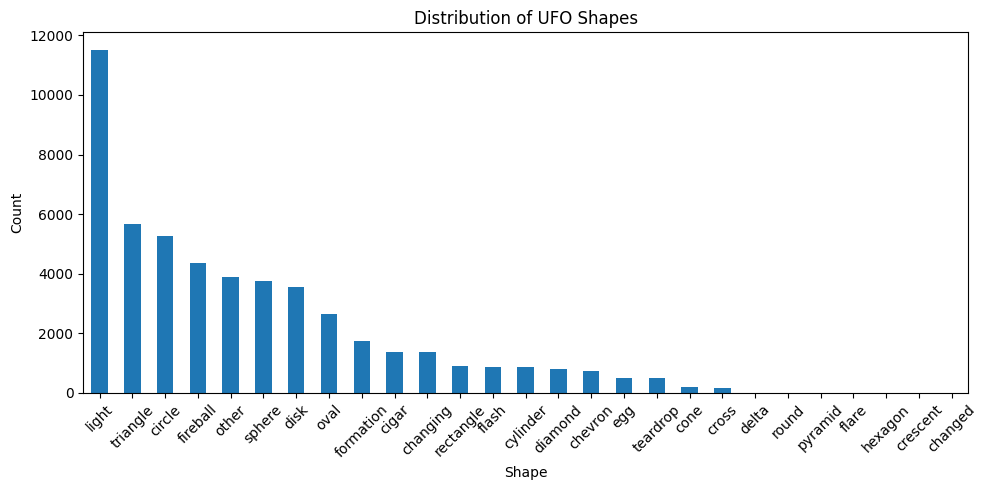

In [114]:
import matplotlib.pyplot as plt
merged['shape'].value_counts().plot(kind='bar', figsize=(10, 5), title='Distribution of UFO Shapes')
plt.xlabel('Shape')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [115]:
shape_counts_2 = merged['shape'].astype(str).str.lower().value_counts()

for value, count in shape_counts_2.items():
    print(f"'{value}' appears {count} times")

'light' appears 11526 times
'triangle' appears 5661 times
'circle' appears 5279 times
'fireball' appears 4375 times
'other' appears 3898 times
'sphere' appears 3753 times
'disk' appears 3554 times
'oval' appears 2632 times
'formation' appears 1736 times
'cigar' appears 1385 times
'changing' appears 1359 times
'rectangle' appears 901 times
'flash' appears 881 times
'cylinder' appears 874 times
'diamond' appears 817 times
'chevron' appears 723 times
'egg' appears 511 times
'teardrop' appears 492 times
'cone' appears 200 times
'cross' appears 169 times
'delta' appears 7 times
'round' appears 2 times
'pyramid' appears 1 times
'flare' appears 1 times
'hexagon' appears 1 times
'crescent' appears 1 times
'changed' appears 1 times


In [116]:
### binning target var 

# Step 1: Count shape frequencies
shape_counts = merged['shape'].value_counts()

# Step 2: Filter out shapes with 7 or fewer appearances
valid_shapes = shape_counts[shape_counts > 7].index
merged = merged[merged['shape'].isin(valid_shapes)]

# Step 3: Define binning map
shape_bins = {
    'light': 'luminous',
    'fireball': 'luminous',
    'flash': 'luminous',
    
    'circle': 'round',
    'sphere': 'round',
    'oval': 'round',
    'egg': 'round',
    'teardrop': 'round',
    
    'cigar': 'elongated',
    'cylinder': 'elongated',
    'cone': 'elongated',
    
    'triangle': 'angular',
    'rectangle': 'angular',
    'diamond': 'angular',
    'chevron': 'angular',
    'cross': 'angular',
    
    'changing': 'irregular',
    'formation': 'irregular',
    
    'disk': 'other',
    'other': 'other'
}

# Apply binning
merged['shape_binned'] = merged['shape'].map(shape_bins)

print(merged['shape_binned'].value_counts())


shape_binned
luminous     16782
round        12667
angular       8271
other         7452
irregular     3095
elongated     2459
Name: count, dtype: int64


In [117]:
merged = merged.drop(columns=['shape'])
merged.head()

,duration (seconds),latitude,longitude,date,time,temperature_2m,pressure_msl,cloudcover,shape_binned
0,2700,29.88,-97.94,1949-10-10,20:30:00,25.633333,1010.937500,64.125000,elongated
1,20,28.98,-96.65,1956-10-10,21:00:00,24.116667,1020.758333,0.708333,round
2,900,21.42,-157.80,1960-10-10,20:00:00,25.325000,1014.175000,49.083333,luminous
3,300,36.60,-82.19,1961-10-10,19:00:00,16.120833,1023.329167,0.166667,round
4,1200,41.12,-73.41,1965-10-10,23:45:00,13.833333,1006.854167,42.041667,other


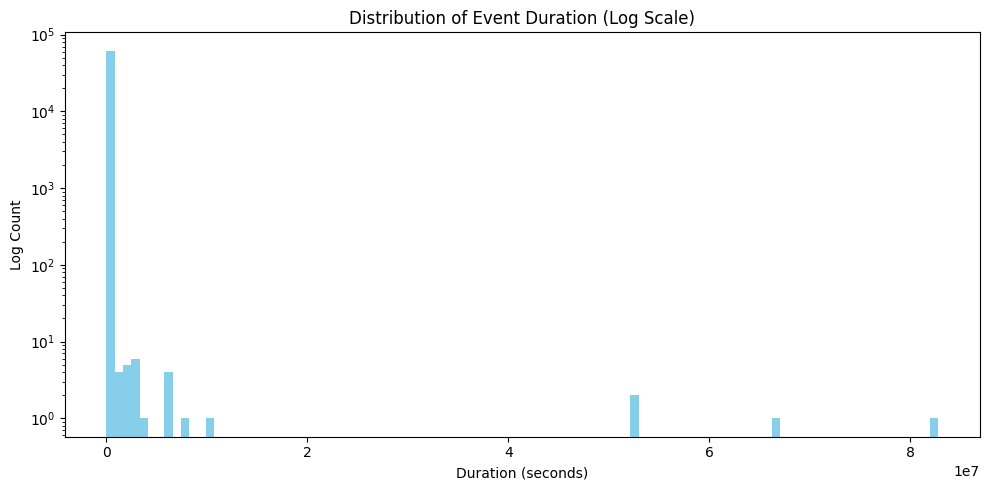

In [118]:
plt.figure(figsize=(10, 5))
plt.hist(df['duration (seconds)'], bins=100, log=True, color='skyblue')
plt.title('Distribution of Event Duration (Log Scale)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Log Count')
plt.tight_layout()
plt.show()

In [119]:
shape_counts_3 = merged['duration (seconds)'].astype(str).str.lower().value_counts()

for value, count in shape_counts_3.items():
    print(f"'{value}' appears {count} times")

'300' appears 5404 times
'120' appears 4421 times
'600' appears 3901 times
'60' appears 3572 times
'180' appears 3194 times
'900' appears 2495 times
'30' appears 2237 times
'10' appears 2145 times
'5' appears 1852 times
'1200' appears 1807 times
'1800' appears 1645 times
'15' appears 1345 times
'240' appears 1328 times
'3600' appears 1287 times
'2' appears 1280 times
'20' appears 1171 times
'3' appears 1022 times
'7200' appears 674 times
'45' appears 652 times
'2700' appears 596 times
'4' appears 571 times
'420' appears 548 times
'90' appears 430 times
'360' appears 410 times
'1' appears 400 times
'480' appears 365 times
'6' appears 308 times
'10800' appears 299 times
'1500' appears 277 times
'7' appears 274 times
'8' appears 270 times
'40' appears 249 times
'2400' appears 232 times
'25' appears 181 times
'5400' appears 167 times
'720' appears 155 times
'300.0' appears 151 times
'120.0' appears 148 times
'14400' appears 142 times
'12' appears 131 times
'600.0' appears 109 times
'60.0' 

In [120]:
merged['duration (seconds)'] = pd.to_numeric(merged['duration (seconds)'], errors='coerce')

In [121]:
#duration binning 
merged = merged.dropna(subset=['duration (seconds)'])

# Create bins based on log scale
bins = [0, 10, 30, 60, 180, 600, 1800, 3600, 10800, np.inf]
labels = [
    'very short (<10s)',       # quick flashes
    'short (10–30s)',          
    'brief (30–60s)',          
    'minute-long (1–3m)',      
    'short event (3–10m)',     
    'medium (10–30m)',         
    'long (30–60m)',           
    'very long (1–3h)',        
    'extended (>3h)'           # likely unreliable reports or misentries
]

merged['duration_binned'] = pd.cut(merged['duration (seconds)'], bins=bins, labels=labels, right=False)
print(merged['duration_binned'].value_counts(dropna=False))

duration_binned
short event (3–10m)    11705
medium (10–30m)         9253
minute-long (1–3m)      8889
very short (<10s)       6311
short (10–30s)          5216
brief (30–60s)          3400
long (30–60m)           2779
very long (1–3h)        2340
extended (>3h)           833
Name: count, dtype: int64


In [122]:
merged.drop(columns=['duration (seconds)'], inplace=True)
merged.head()

,latitude,longitude,date,time,temperature_2m,pressure_msl,cloudcover,shape_binned,duration_binned
0,29.88,-97.94,1949-10-10,20:30:00,25.633333,1010.937500,64.125000,elongated,long (30–60m)
1,28.98,-96.65,1956-10-10,21:00:00,24.116667,1020.758333,0.708333,round,short (10–30s)
2,21.42,-157.80,1960-10-10,20:00:00,25.325000,1014.175000,49.083333,luminous,medium (10–30m)
3,36.60,-82.19,1961-10-10,19:00:00,16.120833,1023.329167,0.166667,round,short event (3–10m)
4,41.12,-73.41,1965-10-10,23:45:00,13.833333,1006.854167,42.041667,other,medium (10–30m)


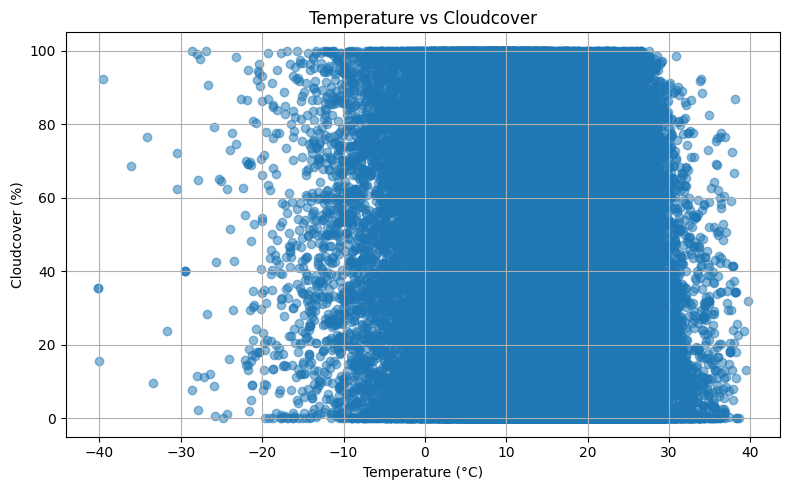

In [123]:
## temp and cloud cover scaterplot
plt.figure(figsize=(8, 5))
plt.scatter(merged['temperature_2m'], merged['cloudcover'], alpha=0.5)
plt.title('Temperature vs Cloudcover')
plt.xlabel('Temperature (°C)')
plt.ylabel('Cloudcover (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

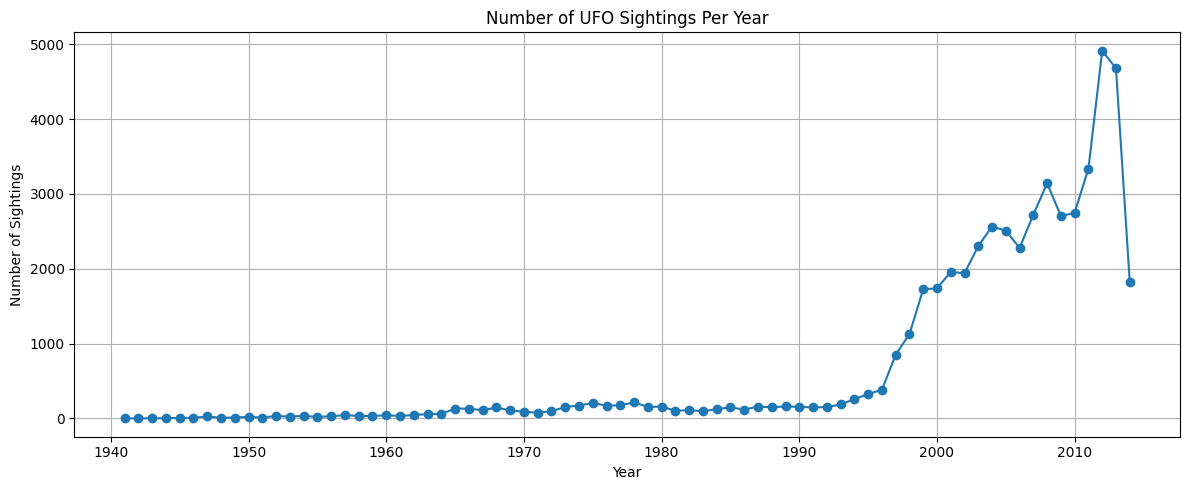

In [124]:
## sightings over time
merged['year'] = pd.to_datetime(merged['date']).dt.year
sightings_by_year = merged['year'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
sightings_by_year.plot(kind='line', marker='o')
plt.title('Number of UFO Sightings Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.tight_layout()
plt.show()

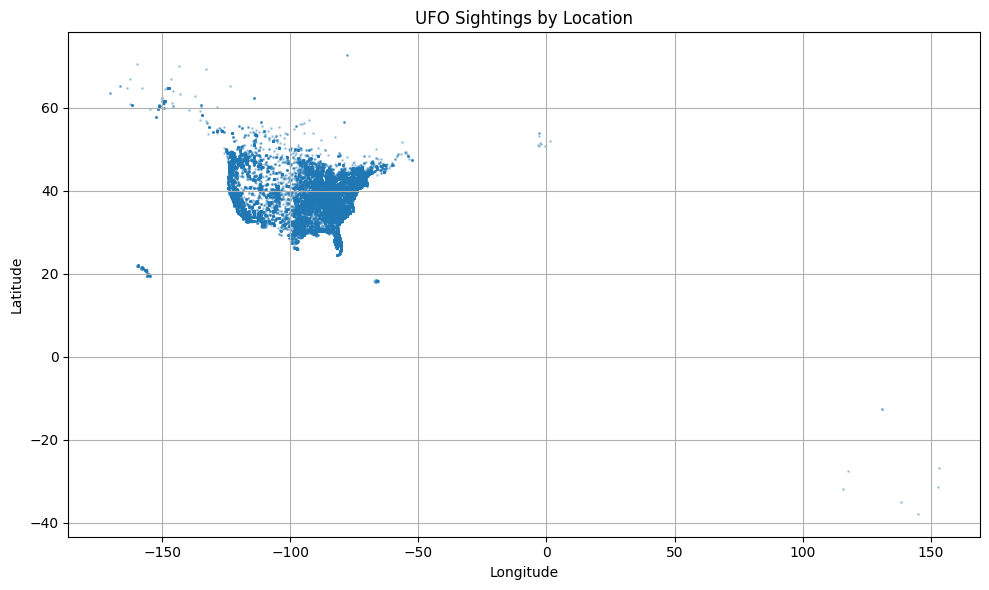

In [125]:
## long vs lat 
plt.figure(figsize=(10, 6))
plt.scatter(merged['longitude'], merged['latitude'], alpha=0.3, s=1)
plt.title('UFO Sightings by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
## temp binning 
def bin_temp(temp):
    try:
        t = float(temp)
    except:
        return 'unknown'
    if t < 0:
        return 'freezing'
    elif t < 10:
        return 'cold'
    elif t < 20:
        return 'cool'
    elif t < 30:
        return 'mild'
    else:
        return 'hot'

merged['temperature_binned'] = merged['temperature_2m'].apply(bin_temp)
print(merged['temperature_binned'].value_counts(dropna=False))

temperature_binned
cool        17846
mild        15214
cold        12279
freezing     4418
hot           969
Name: count, dtype: int64


In [127]:
# pressure binning 
def bin_pressure(p):
    try:
        p = float(p)
    except:
        return 'unknown'
    if p < 1000:
        return 'low'
    elif p < 1020:
        return 'normal'
    else:
        return 'high'

merged['pressure_binned'] = merged['pressure_msl'].apply(bin_pressure)
print(merged['pressure_binned'].value_counts(dropna=False))

pressure_binned
normal    35650
high      14684
low         392
Name: count, dtype: int64


In [128]:
# cloudcover binning 
def bin_cloudcover(cc):
    try:
        cc = float(cc)
    except:
        return 'unknown'
    if cc < 20:
        return 'clear'
    elif cc < 70:
        return 'partly cloudy'
    else:
        return 'overcast'

merged['cloudcover_binned'] = merged['cloudcover'].apply(bin_cloudcover)
print(merged['cloudcover_binned'].value_counts(dropna=False))

cloudcover_binned
partly cloudy    23336
clear            14281
overcast         13109
Name: count, dtype: int64


In [129]:
# time binning 
def bin_time(t):
    try:
        hour = int(str(t).split(':')[0])
    except:
        return 'unknown'
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

merged['time_binned'] = merged['time'].apply(bin_time)
print(merged['time_binned'].value_counts(dropna=False))

time_binned
night        26936
evening      14221
morning       4991
afternoon     4578
Name: count, dtype: int64


In [130]:
## date exploration 
# Make sure date is in datetime format

# Get year range
min_year = merged['date'].min()
max_year = merged['date'].max()
print(f"Year range: {min_year} to {max_year}")


Year range: 1941-06-01 to 2014-05-08


In [131]:
# date binning 
merged['date'] = pd.to_datetime(merged['date'], errors='coerce')
merged = merged[merged['date'].notna()]  # Drop missing
merged['date_decade'] = (merged['date'].dt.year // 10 * 10).astype(str) + 's'
print(merged['date_decade'].value_counts().sort_index())

date_decade
1940s       65
1950s      284
1960s      862
1970s     1507
1980s     1325
1990s     5309
2000s    23866
2010s    17508
Name: count, dtype: int64


In [132]:
## latitiude binning 
def bin_latitude(lat):
    if lat < -60:
        return 'Antarctic'
    elif lat < -23.5:
        return 'Southern Temperate'
    elif lat < 0:
        return 'Tropics South'
    elif lat < 23.5:
        return 'Tropics North'
    elif lat < 60:
        return 'Northern Temperate'
    else:
        return 'Arctic'

merged['lat_zone'] = merged['latitude'].apply(bin_latitude)
print(merged['lat_zone'].value_counts().sort_index())

lat_zone
Arctic                  218
Northern Temperate    50275
Southern Temperate        6
Tropics North           225
Tropics South             2
Name: count, dtype: int64


In [133]:
## longitude binning 
def bin_longitude(lon):
    if lon < -120:
        return 'Americas West'
    elif lon < -60:
        return 'Americas East'
    elif lon < 0:
        return 'Atlantic–Europe'
    elif lon < 60:
        return 'Africa–West Asia'
    elif lon < 120:
        return 'Central–East Asia'
    else:
        return 'Pacific Rim'

merged['lon_zone'] = merged['longitude'].apply(bin_longitude)
print(merged['lon_zone'].value_counts().sort_index())

lon_zone
Africa–West Asia         1
Americas East        43584
Americas West         7099
Atlantic–Europe         34
Central–East Asia        2
Pacific Rim              6
Name: count, dtype: int64


In [134]:
merged.head()

,latitude,longitude,date,time,temperature_2m,pressure_msl,cloudcover,shape_binned,duration_binned,year,temperature_binned,pressure_binned,cloudcover_binned,time_binned,date_decade,lat_zone,lon_zone
0,29.88,-97.94,1949-10-10,20:30:00,25.633333,1010.937500,64.125000,elongated,long (30–60m),1949,mild,normal,partly cloudy,evening,1940s,Northern Temperate,Americas East
1,28.98,-96.65,1956-10-10,21:00:00,24.116667,1020.758333,0.708333,round,short (10–30s),1956,mild,high,clear,night,1950s,Northern Temperate,Americas East
2,21.42,-157.80,1960-10-10,20:00:00,25.325000,1014.175000,49.083333,luminous,medium (10–30m),1960,mild,normal,partly cloudy,evening,1960s,Tropics North,Americas West
3,36.60,-82.19,1961-10-10,19:00:00,16.120833,1023.329167,0.166667,round,short event (3–10m),1961,cool,high,clear,evening,1960s,Northern Temperate,Americas East
4,41.12,-73.41,1965-10-10,23:45:00,13.833333,1006.854167,42.041667,other,medium (10–30m),1965,cool,normal,partly cloudy,night,1960s,Northern Temperate,Americas East


In [135]:
merged.to_csv('merged_bins_and_og.csv', index = False)

In [136]:
merged = merged.drop(columns=['latitude','longitude','date','time','temperature_2m','pressure_msl','cloudcover', 'year'])
merged.head()

,shape_binned,duration_binned,temperature_binned,pressure_binned,cloudcover_binned,time_binned,date_decade,lat_zone,lon_zone
0,elongated,long (30–60m),mild,normal,partly cloudy,evening,1940s,Northern Temperate,Americas East
1,round,short (10–30s),mild,high,clear,night,1950s,Northern Temperate,Americas East
2,luminous,medium (10–30m),mild,normal,partly cloudy,evening,1960s,Tropics North,Americas West
3,round,short event (3–10m),cool,high,clear,evening,1960s,Northern Temperate,Americas East
4,other,medium (10–30m),cool,normal,partly cloudy,night,1960s,Northern Temperate,Americas East


In [138]:
merged.to_csv('merged_bins_only.csv', index = False)

In [ ]:
##### time for modeling 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [196]:
!pip install xgboost

In [197]:
import xgboost as xgb

In [198]:
X = merged.drop(columns=['shape_binned'])
y = merged['shape_binned']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

X_train_enc = pd.get_dummies(X_train)
X_test_enc = pd.get_dummies(X_test)

X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

X_train_enc.columns = X_train_enc.columns.str.replace(r'[\[\]<>]', '', regex=True)
X_test_enc.columns = X_test_enc.columns.str.replace(r'[\[\]<>]', '', regex=True)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_enc, y_train)

y_pred = xgb_model.predict(X_test_enc)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


C:\Users\Denise Campos\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:45:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.355016755371575

Confusion Matrix:
 [[  94    1    1 1277   78  224]
 [  21    1    0  297   63  127]
 [  19    1    3  491   23   95]
 [  72    3    3 2858   76  330]
 [  59    9    3  900  163  376]
 [  75    8    1 1784  127  483]]

Classification Report:
               precision    recall  f1-score   support

     angular       0.28      0.06      0.09      1675
   elongated       0.04      0.00      0.00       509
   irregular       0.27      0.00      0.01       632
    luminous       0.38      0.86      0.52      3342
       other       0.31      0.11      0.16      1510
       round       0.30      0.19      0.23      2478

    accuracy                           0.36     10146
   macro avg       0.26      0.20      0.17     10146
weighted avg       0.31      0.36      0.27     10146



In [199]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [202]:
from sklearn.utils.class_weight import compute_sample_weight
xgb_model = xgb.XGBClassifier(
    eval_metric='mlogloss',
    random_state=42,
    scale_pos_weight=None,  # only for binary – skip this for multi-class
    use_label_encoder=False
)

# Automatically balances classes in multi-class problems
xgb_model.fit(X_train_enc, y_train, sample_weight=compute_sample_weight(class_weight='balanced', y=y_train))

y_pred = xgb_model.predict(X_test_enc)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

C:\Users\Denise Campos\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:53:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.2404888626059531

Confusion Matrix:
 [[ 513  248  328  367  133   86]
 [  93  142   83   77   83   31]
 [ 141   91  170  135   55   40]
 [ 674  355  713 1172  207  221]
 [ 306  315  277  261  253   98]
 [ 417  478  494  648  251  190]]

Classification Report:
               precision    recall  f1-score   support

     angular       0.24      0.31      0.27      1675
   elongated       0.09      0.28      0.13       509
   irregular       0.08      0.27      0.13       632
    luminous       0.44      0.35      0.39      3342
       other       0.26      0.17      0.20      1510
       round       0.29      0.08      0.12      2478

    accuracy                           0.24     10146
   macro avg       0.23      0.24      0.21     10146
weighted avg       0.30      0.24      0.25     10146

